In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
import glob
import os
import seaborn as sns
import scipy
import glob
import sklearn 
from tqdm import tqdm
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage

In [2]:
# Data for the first round of clustering
folder_name_1 = 'AE_Training_1'
file_name_1 = '21_Latent_Space'

# Location to save and load data for round 2 of clustering
folder_name_2 = 'AE_Training_2'
file_name_2 = '21_Latent_Space'

# Location of differently trained AE's for round 2 of clustering
# folder_name_3 = ''
# folder_name_4 = ''
# folder_name_5 = ''

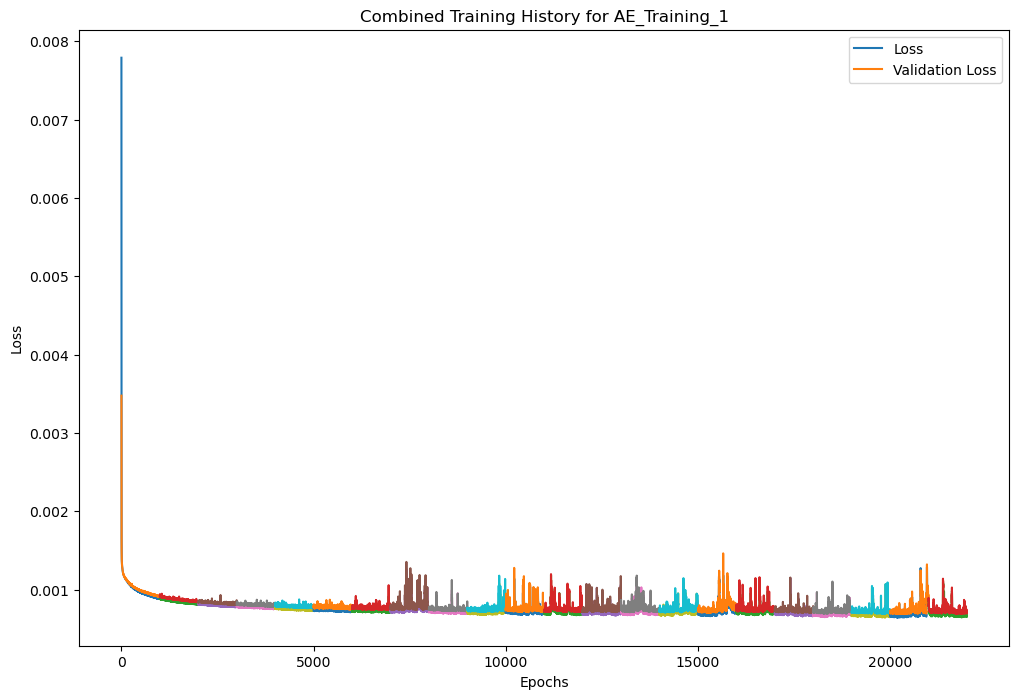

<Figure size 640x480 with 0 Axes>

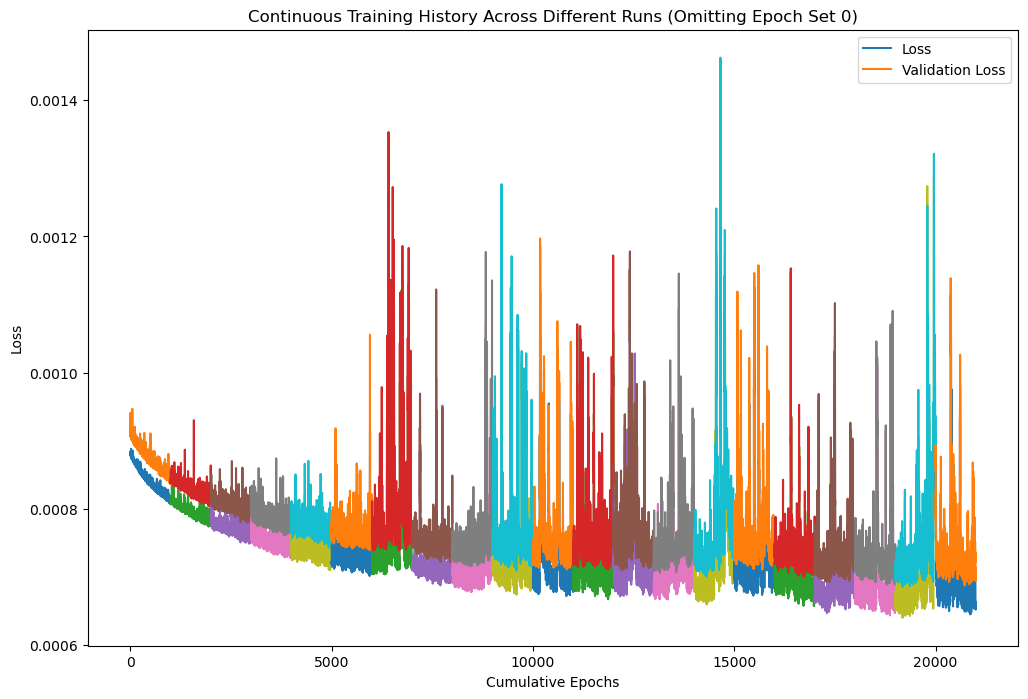

Minimum Loss: 0.000640 at Epoch 19181
Minimum Validation Loss: 0.000686 at Epoch 19181


<Figure size 640x480 with 0 Axes>

In [3]:
name = '_Autoencoder_Training_History' 

# Create a figure for plotting
plt.figure(figsize=(12, 8))

cumulative_epochs_1 = 0  # Variable to track the total number of epochs plotted

for count in range(22):  # 20 because range is exclusive on the upper bound
    file_name = os.path.join(folder_name_1, str(count) + name)
    try:
        # Load the training history file
        training_history = pd.read_pickle(file_name)
        
        # Number of epochs in the current training run
        num_epochs_1 = len(training_history)

        # Generate a range of epoch numbers for the current training run
        epoch_range_1 = range(cumulative_epochs_1, cumulative_epochs_1 + num_epochs_1)
        
        # Add labels only for the first epoch set
        if count == 0:
            loss_label = 'Loss'
            val_loss_label = 'Validation Loss'
        else:
            loss_label = None
            val_loss_label = None

        # Plot the training history with the adjusted epoch range
        plt.plot(epoch_range_1, training_history['loss'], label=loss_label)
        plt.plot(epoch_range_1, training_history['val_loss'], label=val_loss_label)

        # Update the cumulative number of epochs
        cumulative_epochs_1 += num_epochs_1

    except FileNotFoundError:
        print(f"File not found: {file_name}")

# Add labels
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Combined Training History for {folder_name_1}')

plt.show()

# Save the combined plot
# plt.savefig(os.path.join(folder_name_1, 'Combined_Training_History.png'), dpi=300)
plt.clf()  

# Figure 2: No Epoch Set 0

# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Initialize variables to track the minimum loss and validation loss
min_loss = float('inf')
min_val_loss = float('inf')
min_loss_epoch = None
min_val_loss_epoch = None
cumulative_epochs_2 = 0

for count in range(1, 22):  # Starting from 1 to omit epoch set 0
    file_name = os.path.join(folder_name_1, str(count) + name)
    try:
        # Load the training history file
        training_history = pd.read_pickle(file_name)
        
        # Number of epochs in the current training run
        num_epochs_2 = len(training_history)

        # Generate a range of epoch numbers for the current training run
        epoch_range_2 = range(cumulative_epochs_2, cumulative_epochs_2 + num_epochs_2)

        # Plot the training history
        plt.plot(epoch_range_2, training_history['loss'], label='Loss' if count == 1 else None)
        plt.plot(epoch_range_2, training_history['val_loss'], label='Validation Loss' if count == 1 else None)

        # Check and update minimum loss and validation loss
        local_min_loss = training_history['loss'].min()
        local_min_val_loss = training_history['val_loss'].min()
        local_min_loss_epoch = training_history['loss'].idxmin()
        local_min_val_loss_epoch = training_history['val_loss'].idxmin()

        if local_min_loss < min_loss:
            min_loss = local_min_loss
            min_loss_epoch = local_min_loss_epoch + cumulative_epochs_2
        if local_min_val_loss < min_val_loss:
            min_val_loss = local_min_val_loss
            min_val_loss_epoch = local_min_val_loss_epoch + cumulative_epochs_2

        # Update the cumulative number of epochs
        cumulative_epochs_2 += num_epochs_2

    except FileNotFoundError:
        print(f"File not found: {file_name}")

# Add legend and labels
plt.legend()
plt.xlabel('Cumulative Epochs')
plt.ylabel('Loss')
plt.title('Continuous Training History Across Different Runs (Omitting Epoch Set 0)')

# Display the figure
plt.show()

# Optionally save the figure
# plt.savefig(os.path.join(folder_name_1, 'Continuous_Training_History_No_ES_0.png'), dpi=300)
plt.clf()  

# Print the minimum loss and validation loss with corresponding epochs
print(f"Minimum Loss: {min_loss:.6f} at Epoch {min_loss_epoch}")
print(f"Minimum Validation Loss: {min_val_loss:.6f} at Epoch {min_val_loss_epoch}")

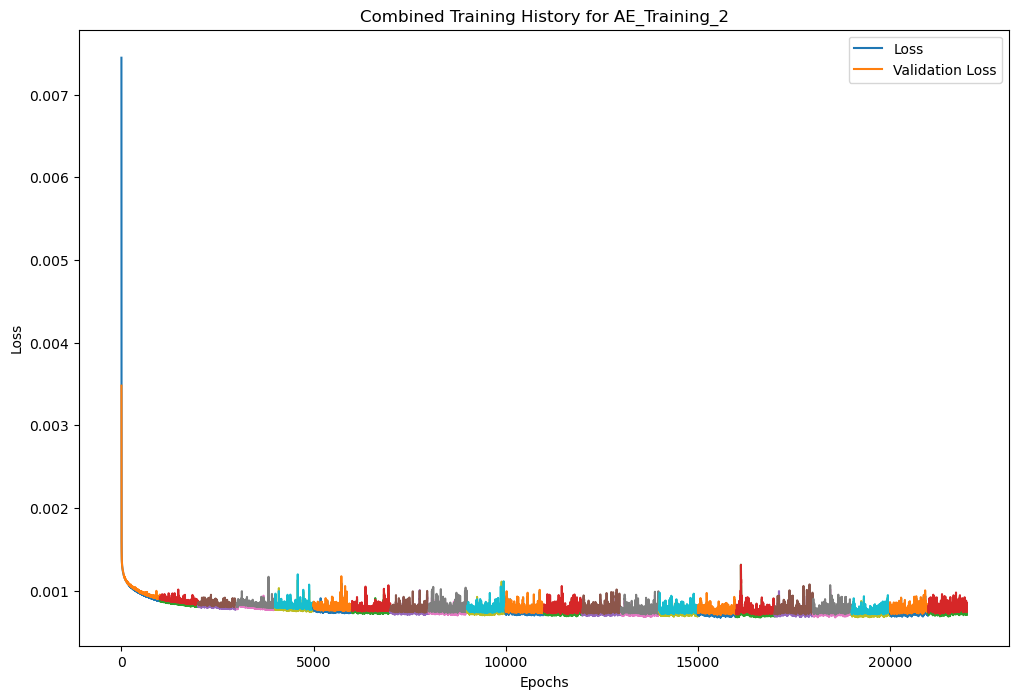

<Figure size 640x480 with 0 Axes>

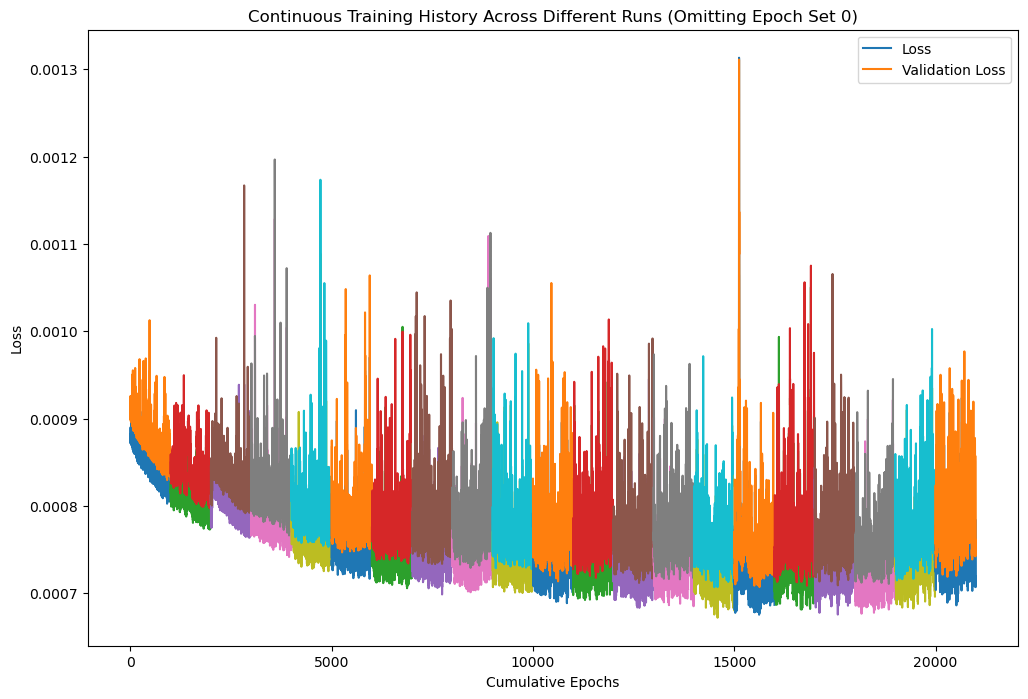

Minimum Loss: 0.000672 at Epoch 14586
Minimum Validation Loss: 0.000707 at Epoch 14507


<Figure size 640x480 with 0 Axes>

In [4]:
name = '_Autoencoder_Training_History' 

# Create a figure for plotting
plt.figure(figsize=(12, 8))

cumulative_epochs_1 = 0  # Variable to track the total number of epochs plotted

for count in range(22):  # 20 because range is exclusive on the upper bound
    file_name = os.path.join(folder_name_2, str(count) + name)
    try:
        # Load the training history file
        training_history = pd.read_pickle(file_name)
        
        # Number of epochs in the current training run
        num_epochs_1 = len(training_history)

        # Generate a range of epoch numbers for the current training run
        epoch_range_1 = range(cumulative_epochs_1, cumulative_epochs_1 + num_epochs_1)
        
        # Add labels only for the first epoch set
        if count == 0:
            loss_label = 'Loss'
            val_loss_label = 'Validation Loss'
        else:
            loss_label = None
            val_loss_label = None

        # Plot the training history with the adjusted epoch range
        plt.plot(epoch_range_1, training_history['loss'], label=loss_label)
        plt.plot(epoch_range_1, training_history['val_loss'], label=val_loss_label)

        # Update the cumulative number of epochs
        cumulative_epochs_1 += num_epochs_1

    except FileNotFoundError:
        print(f"File not found: {file_name}")

# Add labels
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Combined Training History for {folder_name_2}')

plt.show()

# Save the combined plot
# plt.savefig(os.path.join(folder_name_1, 'Combined_Training_History.png'), dpi=300)
plt.clf()  

# Figure 2: No Epoch Set 0

# Create a figure for plotting
plt.figure(figsize=(12, 8))

# Initialize variables to track the minimum loss and validation loss
min_loss = float('inf')
min_val_loss = float('inf')
min_loss_epoch = None
min_val_loss_epoch = None
cumulative_epochs_2 = 0

for count in range(1, 22):  # Starting from 1 to omit epoch set 0
    file_name = os.path.join(folder_name_2, str(count) + name)
    try:
        # Load the training history file
        training_history = pd.read_pickle(file_name)
        
        # Number of epochs in the current training run
        num_epochs_2 = len(training_history)

        # Generate a range of epoch numbers for the current training run
        epoch_range_2 = range(cumulative_epochs_2, cumulative_epochs_2 + num_epochs_2)

        # Plot the training history
        plt.plot(epoch_range_2, training_history['loss'], label='Loss' if count == 1 else None)
        plt.plot(epoch_range_2, training_history['val_loss'], label='Validation Loss' if count == 1 else None)

        # Check and update minimum loss and validation loss
        local_min_loss = training_history['loss'].min()
        local_min_val_loss = training_history['val_loss'].min()
        local_min_loss_epoch = training_history['loss'].idxmin()
        local_min_val_loss_epoch = training_history['val_loss'].idxmin()

        if local_min_loss < min_loss:
            min_loss = local_min_loss
            min_loss_epoch = local_min_loss_epoch + cumulative_epochs_2
        if local_min_val_loss < min_val_loss:
            min_val_loss = local_min_val_loss
            min_val_loss_epoch = local_min_val_loss_epoch + cumulative_epochs_2

        # Update the cumulative number of epochs
        cumulative_epochs_2 += num_epochs_2

    except FileNotFoundError:
        print(f"File not found: {file_name}")

# Add legend and labels
plt.legend()
plt.xlabel('Cumulative Epochs')
plt.ylabel('Loss')
plt.title('Continuous Training History Across Different Runs (Omitting Epoch Set 0)')

# Display the figure
plt.show()

# Optionally save the figure
# plt.savefig(os.path.join(folder_name_1, 'Continuous_Training_History_No_ES_0.png'), dpi=300)
plt.clf()  

# Print the minimum loss and validation loss with corresponding epochs
print(f"Minimum Loss: {min_loss:.6f} at Epoch {min_loss_epoch}")
print(f"Minimum Validation Loss: {min_val_loss:.6f} at Epoch {min_val_loss_epoch}")

## Clustering

In [5]:
# read in and plot the original data set
latent = pd.read_pickle(f'{folder_name_1}/20_Latent_Space')
latent = latent.replace({'trajectory-0.0': '0', 'trajectory-1.0': '1'}).infer_objects()

In [6]:
# Set the 'index' column as the new index
latent.set_index('index', inplace=True)

# Remove the name of the new index
latent.index.name = None

In [7]:
print(latent)

              x         y  z
11480 -7.586531  0.567537  0
69241 -7.923385  0.059725  1
23321 -5.473639 -1.834530  0
79963 -1.314996  0.128874  1
53139 -7.460699 -2.068390  1
...         ...       ... ..
54086 -6.610475 -1.813323  1
58314 -3.577525 -0.962358  1
16642 -2.664897 -3.951708  0
10766 -6.024659 -2.030483  0
11205 -7.369310  0.902473  0

[16000 rows x 3 columns]


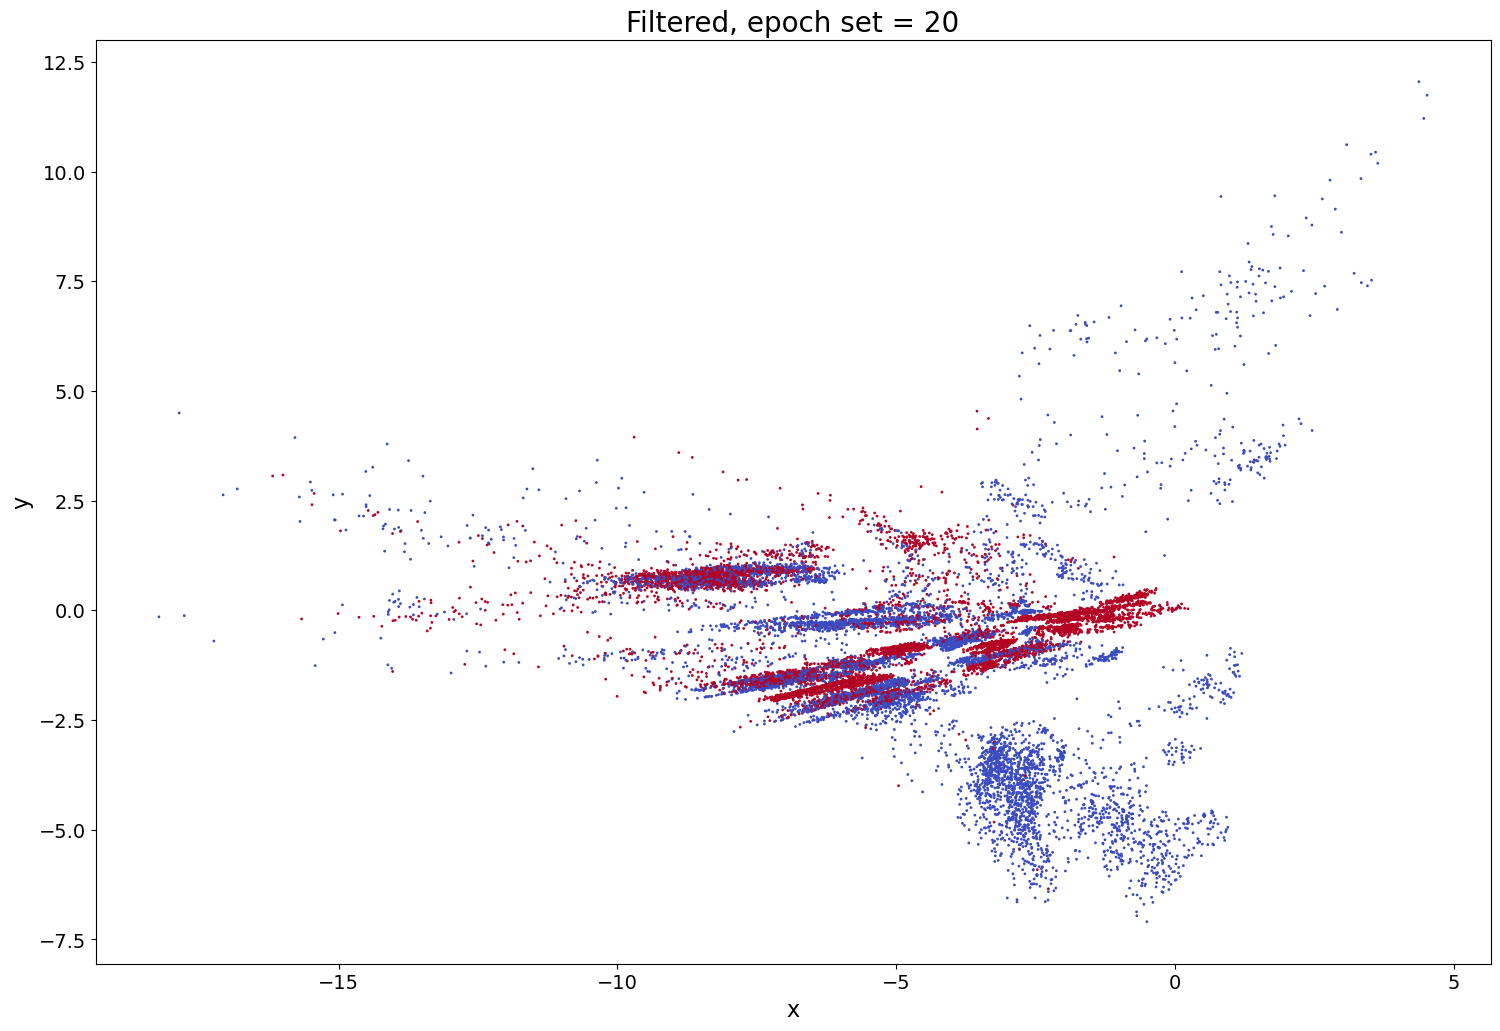

In [8]:
latent['z'] = pd.to_numeric(latent['z'], errors='coerce')

plt.figure(figsize=(18,12))
plt.scatter (latent.x,latent.y, c=latent.z, cmap="coolwarm", s = 1, alpha=1)
plt.title('Filtered, epoch set = 20', fontsize = 20)
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize=14)
# plt.savefig("56_data.png", dpi = 300)

plt.show()

In [9]:
# remove the trajectory identity column for further processing
latent_n = latent.drop(['z'], axis = 1)

# Custering Round 2

In [10]:
# read in and plot the original data set
latent_2 = pd.read_pickle(f'{folder_name_2}/20_Latent_Space')
latent_2 = latent_2.replace({'trajectory-0.0': '0', 'trajectory-1.0': '1'}).infer_objects()

In [11]:
# Set the 'index' column as the new index
latent_2.set_index('index', inplace=True)

# Remove the name of the new index
latent_2.index.name = None

In [12]:
print(latent_2)

              x          y  z
11480  2.672355  -9.491482  0
69241  2.405004 -10.683020  1
23321  1.136191  -3.892785  0
79963 -0.192164  -0.628538  1
53139  3.787285  -9.573817  1
...         ...        ... ..
54086  3.544936  -8.958076  1
58314  2.075577  -6.903740  1
16642  0.640360  -7.930159  0
10766  2.509474  -8.662283  0
11205  2.673645  -9.002752  0

[16000 rows x 3 columns]


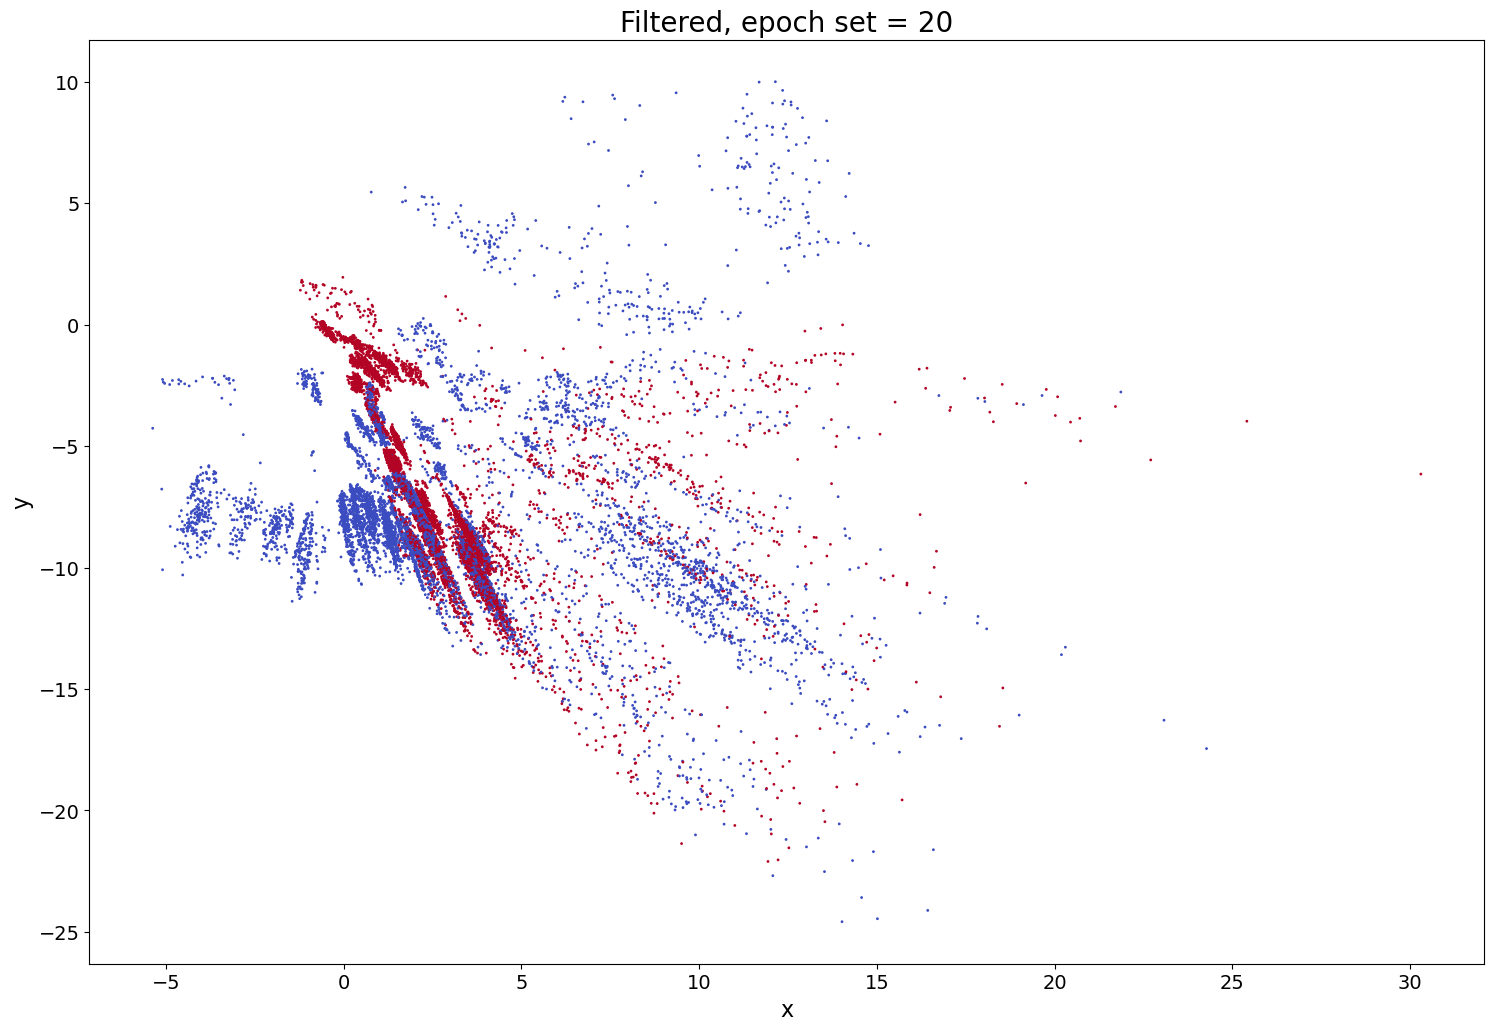

In [13]:
latent_2['z'] = pd.to_numeric(latent_2['z'], errors='coerce')

plt.figure(figsize=(18,12))
plt.scatter (latent_2.x,latent_2.y, c=latent_2.z, cmap="coolwarm", s = 1, alpha=1)
plt.title('Filtered, epoch set = 20', fontsize = 20)
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize=14)
# plt.savefig("56_data.png", dpi = 300)

plt.show()

In [14]:
# remove the trajectory identity column for further processing
latent_2n = latent_2.drop(['z'], axis = 1)

# Consistent Index Extraction:

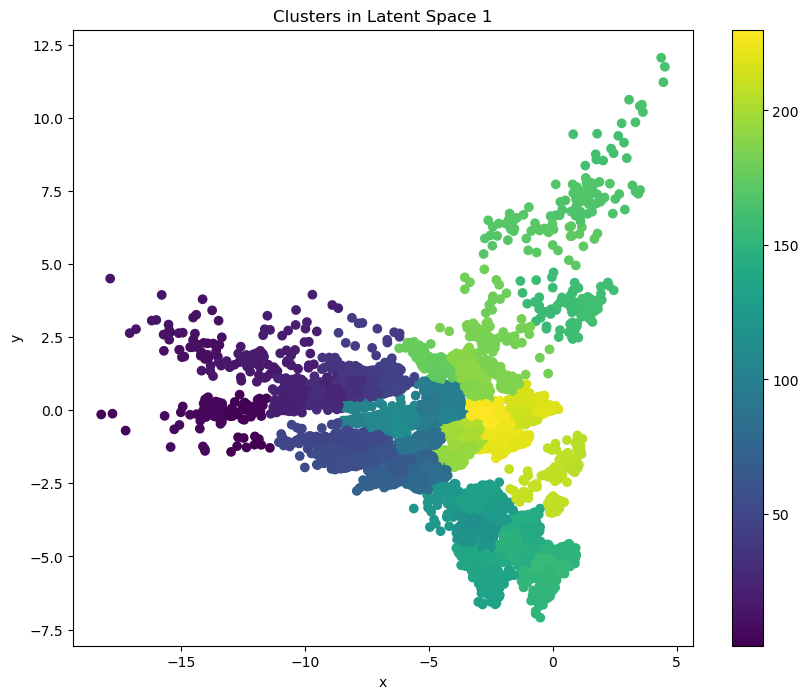

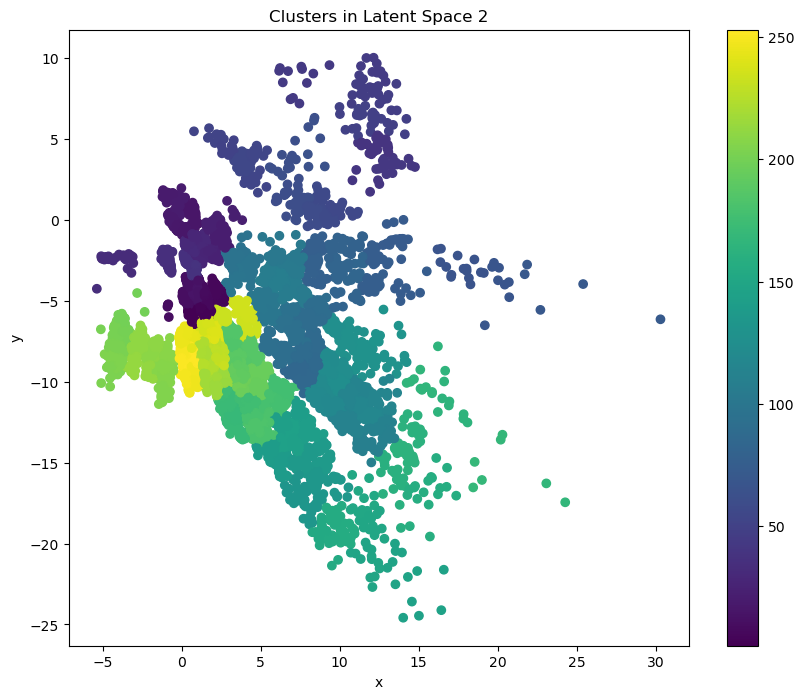

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster, linkage

# Assuming latent and latent_2 are already loaded as DataFrames


# Extract the x and y coordinates for clustering
latent_coords = latent[['x', 'y']].values
latent_2_coords = latent_2[['x', 'y']].values

# Normalize the data
scaler = StandardScaler()
latent_coords_scaled = scaler.fit_transform(latent_coords)
latent_2_coords_scaled = scaler.fit_transform(latent_2_coords)

# Perform agglomerative clustering on both latent spaces
linkage_matrix1 = linkage(latent_coords_scaled, method='ward')
linkage_matrix2 = linkage(latent_2_coords_scaled, method='ward')

# Choose a threshold distance for forming flat clusters
threshold = 1.0  # Adjust based on your data distribution

# Form flat clusters based on the threshold
clusters1 = fcluster(linkage_matrix1, t=threshold, criterion='distance')
clusters2 = fcluster(linkage_matrix2, t=threshold, criterion='distance')

# Combine the cluster assignments from both latent spaces
combined_clusters = np.vstack((clusters1, clusters2)).T

# Find consensus clusters
consensus_clusters = {}
for i, (c1, c2) in enumerate(combined_clusters):
    if (c1, c2) not in consensus_clusters:
        consensus_clusters[(c1, c2)] = []
    consensus_clusters[(c1, c2)].append(int(latent.iloc[i, 0]))  # Capture indices correctly

# Filter out singleton clusters (clusters with only one member)
consensus_clusters = {k: v for k, v in consensus_clusters.items() if len(v) > 10}

# Visualization
def plot_clusters(latent, clusters, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(latent['x'], latent['y'], c=clusters, cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar(scatter)
    plt.show()

# Add cluster labels to the DataFrames for plotting
latent['cluster'] = clusters1
latent_2['cluster'] = clusters2

# Plot clusters in each latent space
plot_clusters(latent, latent['cluster'], 'Clusters in Latent Space 1')
plot_clusters(latent_2, latent_2['cluster'], 'Clusters in Latent Space 2')



In [16]:
# Group the DataFrame by 'cluster' and print the indices sorted by the cluster
clustered_indices = latent.groupby('cluster').apply(lambda df: df.index.tolist())

# Print the indices sorted by the cluster
for cluster_id, indices in clustered_indices.items():
    print(f"Cluster {cluster_id}: {indices}")


Cluster 1: [20052, 10089, 29, 60000, 20055, 28, 40054, 20001, 60215, 40173]
Cluster 2: [10124, 40115, 70126, 30373, 60188, 50052, 50153, 30135, 50035, 50155, 70124, 50067, 70035, 30368, 50061, 50066, 60186]
Cluster 3: [40060, 50074, 61596, 50017, 70107, 50141, 61597, 50024, 40123, 60237, 61614, 40141, 50073]
Cluster 4: [10075, 10112, 10104]
Cluster 5: [30302, 10064, 50068, 40074, 40056, 40016, 40088, 30370, 40049, 30083, 30357, 40111]
Cluster 6: [30350, 30355, 30323, 30324, 50149, 40059, 30078, 50070, 10149, 30123, 30307, 40135, 50043, 30345, 30309, 40098, 70129, 40075, 10121, 50026, 60176, 50033, 30077, 30346, 30094, 50030, 70128, 30322, 50027]
Cluster 7: [10084, 60208, 10135]
Cluster 8: [10119, 10095, 10065, 40086]
Cluster 9: [30005, 20051, 30296, 20030, 30102, 70016, 30003, 30112, 30007, 30087, 30089, 60191, 30392, 70017, 30013]
Cluster 10: [10156, 30040, 40011, 30062, 30047, 40010, 30052, 60192, 30115, 30360, 60174, 70014, 30027, 20019]
Cluster 11: [20272, 20152, 20154, 20252, 2028

/tmp/ipykernel_414812/1242897006.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clustered_indices = latent.groupby('cluster').apply(lambda df: df.index.tolist())


In [17]:
# Sort clusters by the number of indices in each cluster
sorted_clusters = sorted(consensus_clusters.items(), key=lambda item: len(item[1]), reverse=True)

# Print the number of indices in each cluster in descending order
for cluster_id, indices in sorted_clusters:
    print(f"Cluster {cluster_id} has {len(indices)} indices")

Cluster (201, 8) has 274 indices
Cluster (87, 3) has 237 indices
Cluster (224, 36) has 199 indices
Cluster (33, 198) has 131 indices
Cluster (69, 190) has 129 indices
Cluster (86, 3) has 123 indices
Cluster (84, 2) has 122 indices
Cluster (198, 13) has 107 indices
Cluster (31, 191) has 107 indices
Cluster (201, 7) has 106 indices
Cluster (26, 196) has 106 indices
Cluster (216, 17) has 98 indices
Cluster (65, 188) has 96 indices
Cluster (197, 14) has 95 indices
Cluster (63, 230) has 94 indices
Cluster (202, 6) has 94 indices
Cluster (24, 176) has 93 indices
Cluster (213, 16) has 90 indices
Cluster (34, 191) has 89 indices
Cluster (76, 227) has 88 indices
Cluster (226, 29) has 82 indices
Cluster (81, 241) has 80 indices
Cluster (230, 27) has 78 indices
Cluster (74, 227) has 72 indices
Cluster (217, 18) has 72 indices
Cluster (200, 7) has 71 indices
Cluster (81, 227) has 67 indices
Cluster (212, 30) has 67 indices
Cluster (90, 236) has 66 indices
Cluster (62, 215) has 66 indices
Cluster (

In [18]:
print(latent)

              x         y  z  cluster
11480 -7.586531  0.567537  0       38
69241 -7.923385  0.059725  1      104
23321 -5.473639 -1.834530  0       77
79963 -1.314996  0.128874  1      216
53139 -7.460699 -2.068390  1       68
...         ...       ... ..      ...
54086 -6.610475 -1.813323  1       65
58314 -3.577525 -0.962358  1      202
16642 -2.664897 -3.951708  0      117
10766 -6.024659 -2.030483  0       64
11205 -7.369310  0.902473  0       39

[16000 rows x 4 columns]


# Overlaying Cluster Conformations

In [19]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Load the topology and trajectory files for both MD simulations
u1 = mda.Universe("myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc")
u2 = mda.Universe("myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc")

/tmp/ipykernel_414812/3922901260.py:64: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_indices = latent.groupby('cluster').apply(lambda df: df.index.tolist()).to_dict()
Aligning frames: 100%|█████████████████████████| 10/10 [00:00<00:00, 109.74it/s]


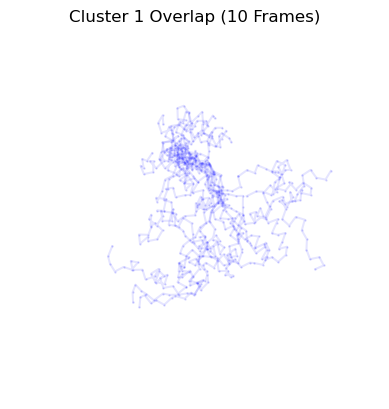

Aligning frames: 100%|█████████████████████████| 17/17 [00:00<00:00, 114.23it/s]


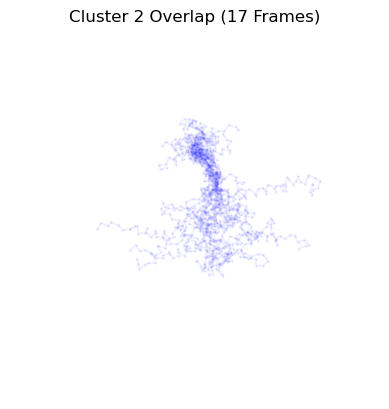

Aligning frames: 100%|█████████████████████████| 13/13 [00:00<00:00, 112.12it/s]


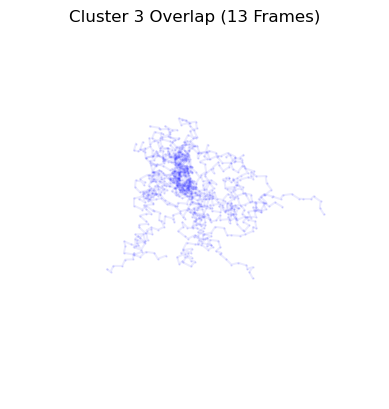

Aligning frames: 100%|███████████████████████████| 3/3 [00:00<00:00, 131.66it/s]


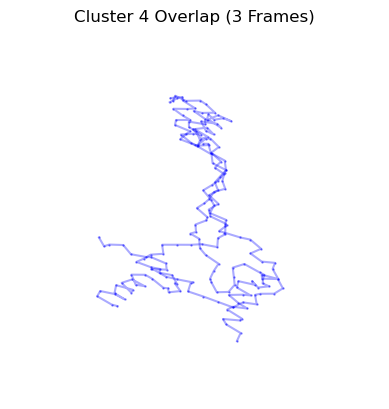

Aligning frames: 100%|█████████████████████████| 12/12 [00:00<00:00, 116.02it/s]


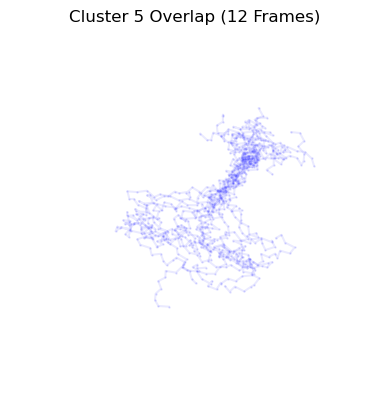

Aligning frames: 100%|██████████████████████████| 29/29 [00:00<00:00, 55.57it/s]


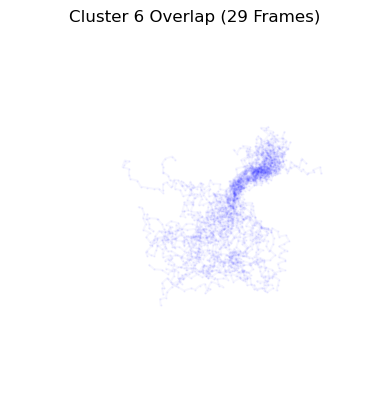

Aligning frames: 100%|████████████████████████████| 3/3 [00:00<00:00, 89.82it/s]


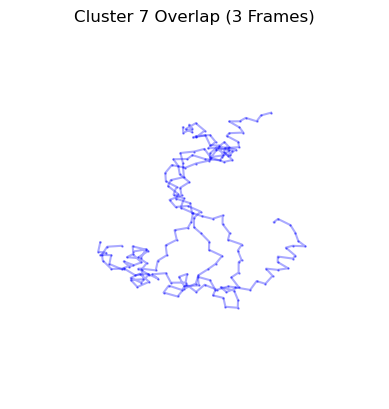

Aligning frames: 100%|███████████████████████████| 4/4 [00:00<00:00, 127.32it/s]


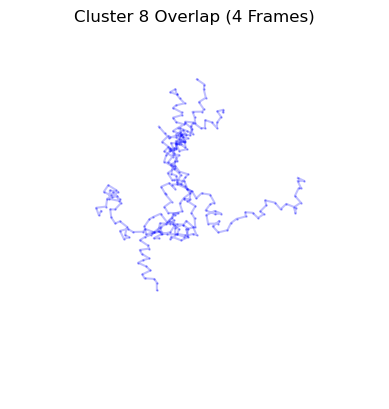

Aligning frames: 100%|█████████████████████████| 15/15 [00:00<00:00, 112.76it/s]


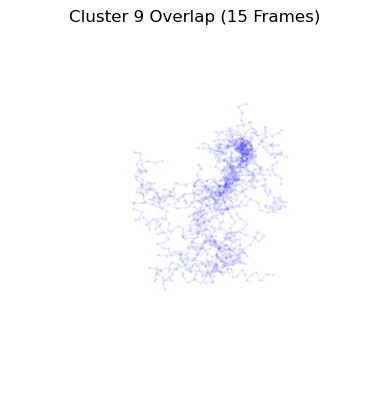

Aligning frames: 100%|█████████████████████████| 14/14 [00:00<00:00, 107.43it/s]


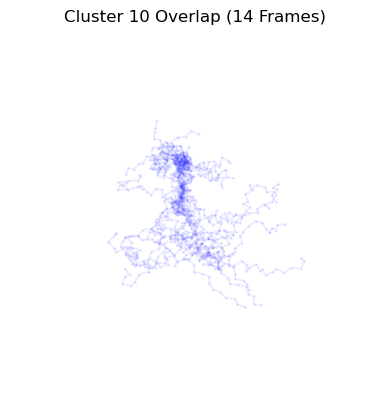

Aligning frames: 100%|████████████████████████████| 5/5 [00:00<00:00, 76.32it/s]


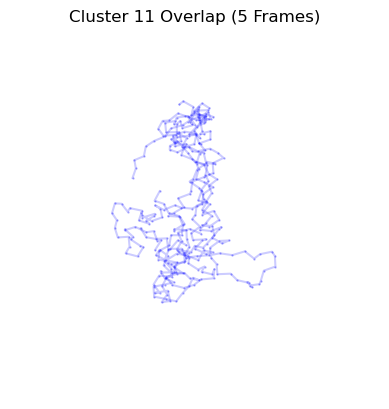

Aligning frames: 100%|███████████████████████████| 7/7 [00:00<00:00, 108.90it/s]


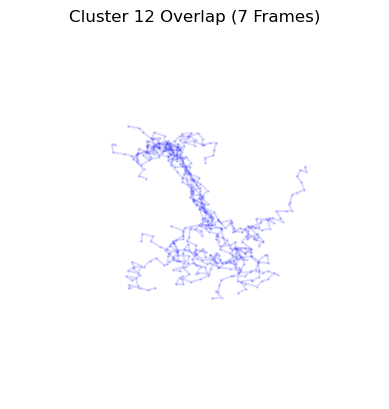

Aligning frames: 100%|███████████████████████████| 5/5 [00:00<00:00, 102.60it/s]


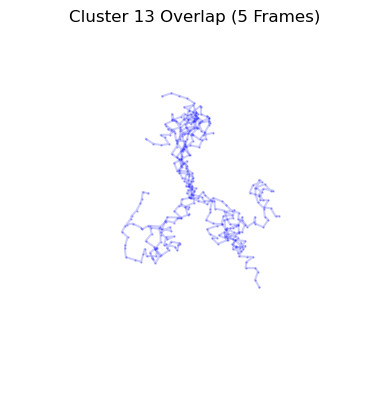

Aligning frames: 100%|███████████████████████████| 1/1 [00:00<00:00, 126.24it/s]


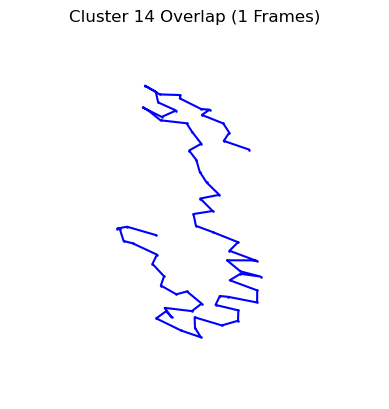

Aligning frames: 100%|█████████████████████████| 11/11 [00:00<00:00, 115.99it/s]


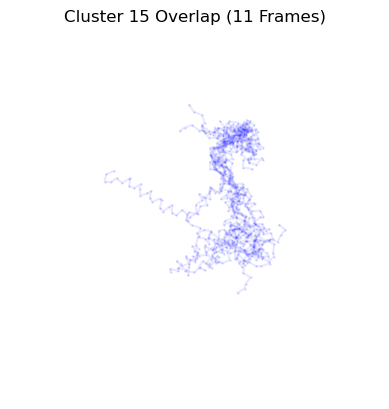

Aligning frames: 100%|█████████████████████████| 10/10 [00:00<00:00, 108.54it/s]


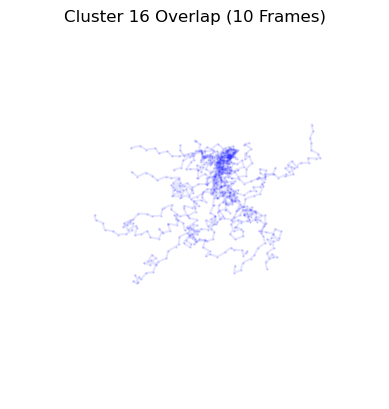

Aligning frames: 100%|█████████████████████████| 24/24 [00:00<00:00, 123.57it/s]


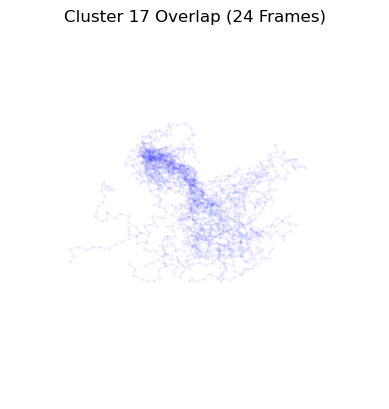

Aligning frames: 100%|█████████████████████████| 16/16 [00:00<00:00, 109.99it/s]


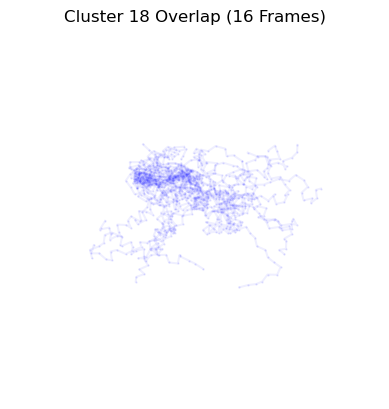

Aligning frames: 100%|███████████████████████████| 6/6 [00:00<00:00, 110.66it/s]


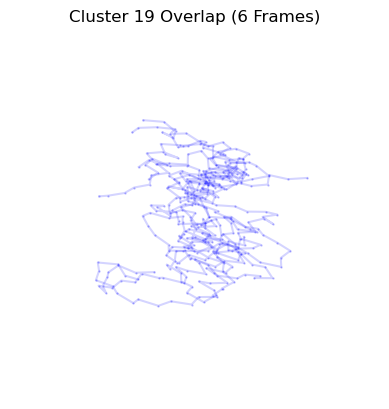

Aligning frames: 100%|███████████████████████████| 8/8 [00:00<00:00, 116.95it/s]


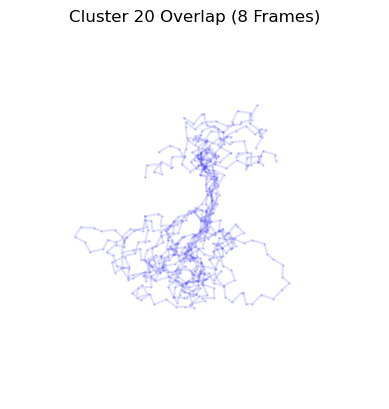

Aligning frames: 100%|█████████████████████████| 41/41 [00:00<00:00, 125.75it/s]


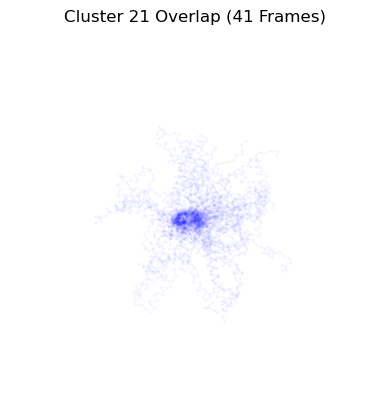

Aligning frames: 100%|██████████████████████████| 52/52 [00:00<00:00, 87.23it/s]


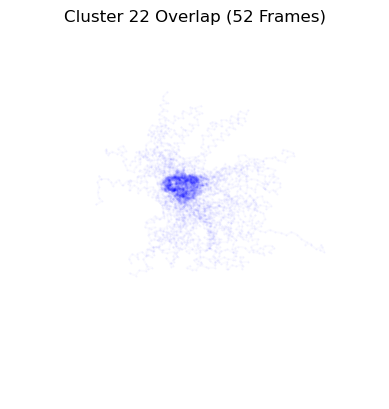

Aligning frames: 100%|█████████████████████████| 30/30 [00:00<00:00, 122.15it/s]


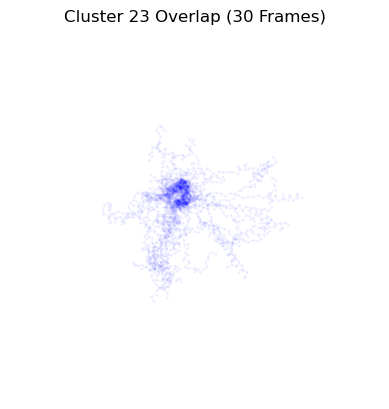

Aligning frames: 100%|███████████████████████| 212/212 [00:01<00:00, 129.08it/s]


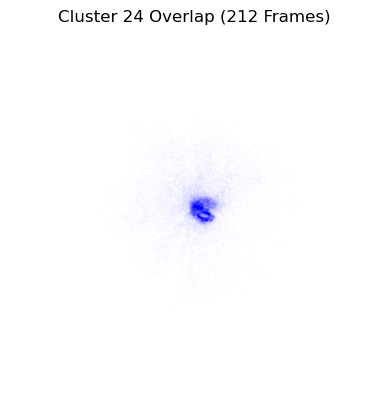

Aligning frames: 100%|███████████████████████| 113/113 [00:01<00:00, 107.21it/s]


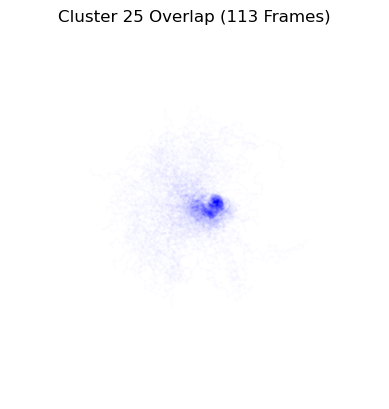

Aligning frames: 100%|███████████████████████| 201/201 [00:01<00:00, 171.15it/s]


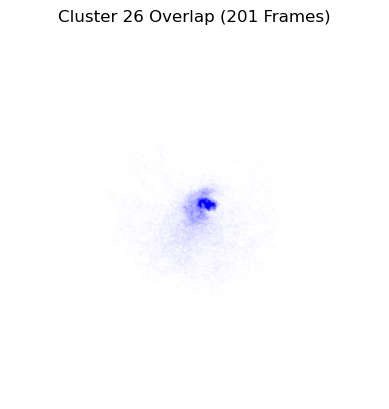

Aligning frames: 100%|██████████████████████████| 23/23 [00:00<00:00, 74.03it/s]


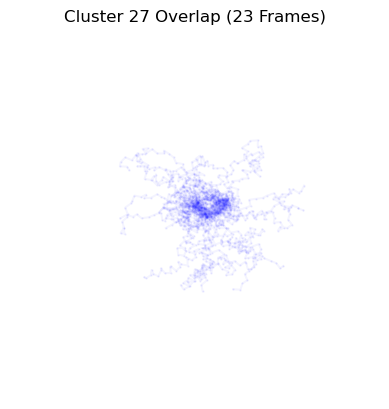

Aligning frames: 100%|█████████████████████████| 19/19 [00:00<00:00, 159.17it/s]


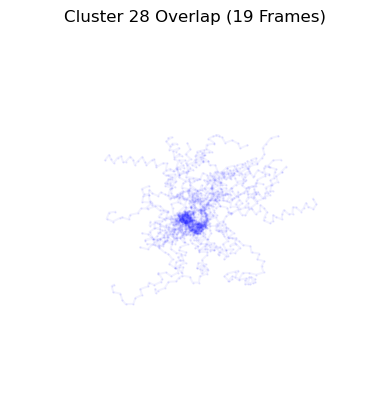

Aligning frames: 100%|█████████████████████████| 64/64 [00:00<00:00, 127.50it/s]


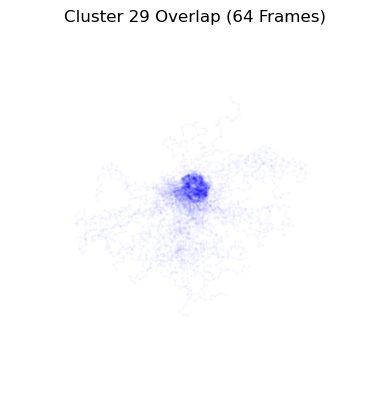

Aligning frames: 100%|███████████████████████| 143/143 [00:00<00:00, 161.99it/s]


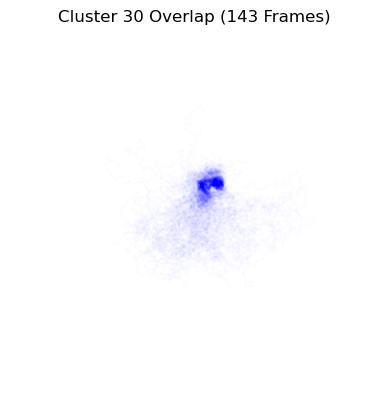

Aligning frames: 100%|███████████████████████| 213/213 [00:01<00:00, 133.83it/s]


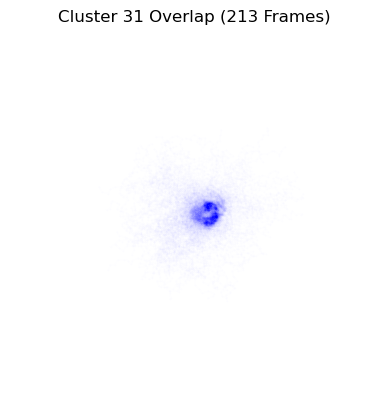

Aligning frames: 100%|█████████████████████████| 92/92 [00:00<00:00, 166.38it/s]


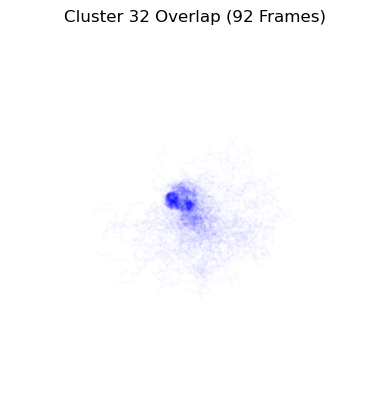

Aligning frames: 100%|███████████████████████| 216/216 [00:01<00:00, 171.67it/s]


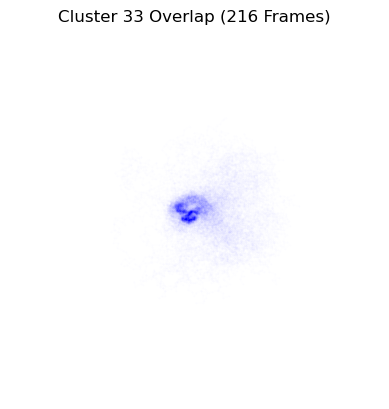

Aligning frames: 100%|███████████████████████| 132/132 [00:00<00:00, 140.75it/s]


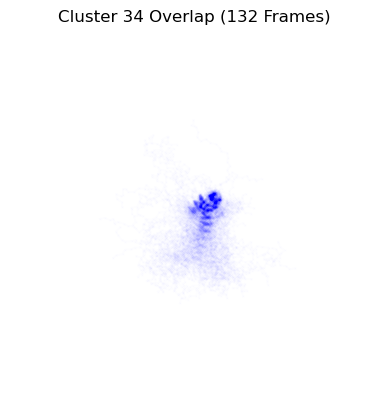

Aligning frames: 100%|███████████████████████| 196/196 [00:01<00:00, 152.41it/s]


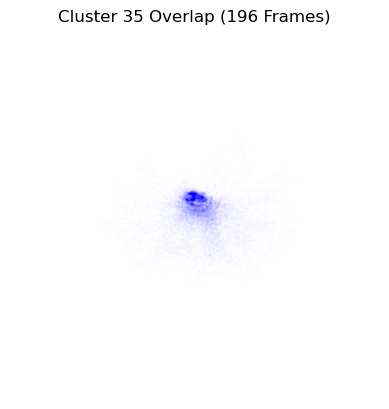

Aligning frames: 100%|█████████████████████████| 13/13 [00:00<00:00, 145.02it/s]


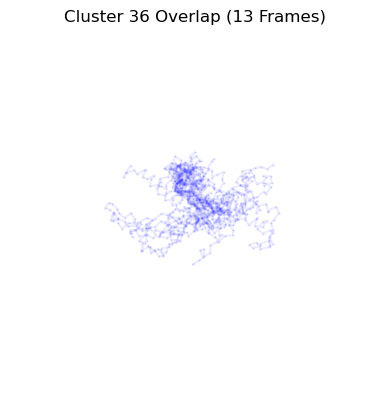

Aligning frames: 100%|██████████████████████████| 32/32 [00:00<00:00, 53.41it/s]


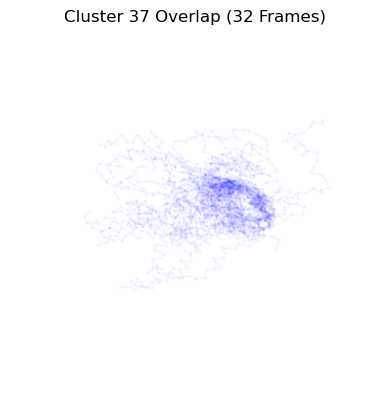

Aligning frames: 100%|███████████████████████| 131/131 [00:00<00:00, 162.31it/s]


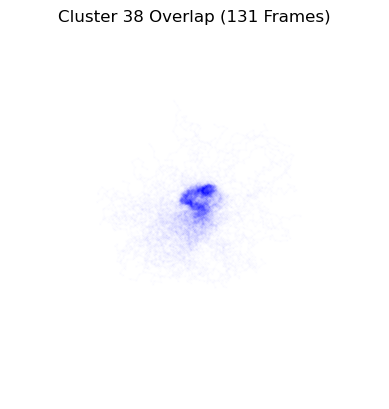

Aligning frames: 100%|█████████████████████████| 97/97 [00:00<00:00, 153.23it/s]


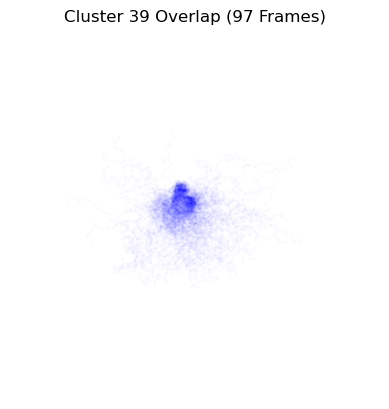

Aligning frames: 100%|███████████████████████| 103/103 [00:00<00:00, 130.03it/s]


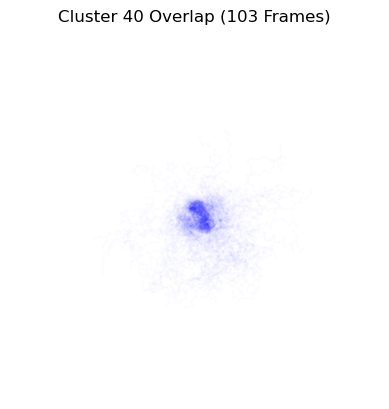

Aligning frames: 100%|███████████████████████████| 8/8 [00:00<00:00, 107.67it/s]


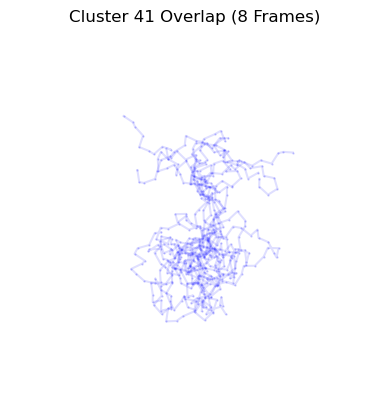

Aligning frames: 100%|███████████████████████████| 6/6 [00:00<00:00, 159.89it/s]


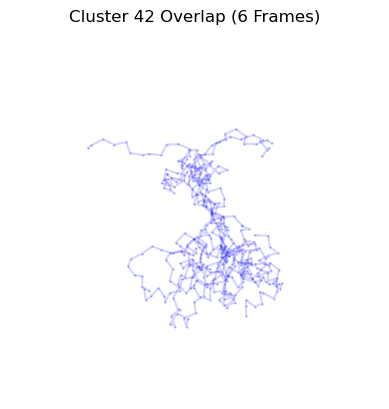

Aligning frames: 100%|█████████████████████████| 40/40 [00:00<00:00, 166.47it/s]


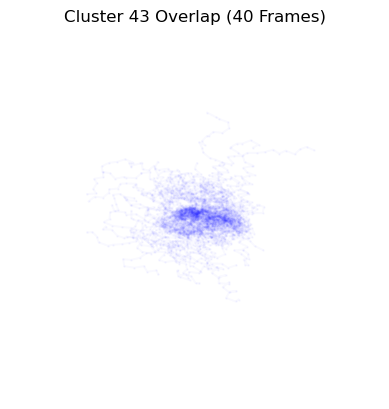

Aligning frames: 100%|█████████████████████████| 64/64 [00:00<00:00, 168.73it/s]


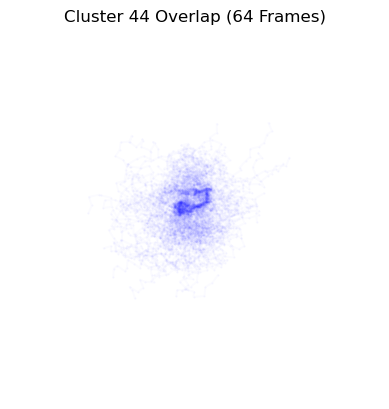

Aligning frames: 100%|███████████████████████| 112/112 [00:00<00:00, 133.76it/s]


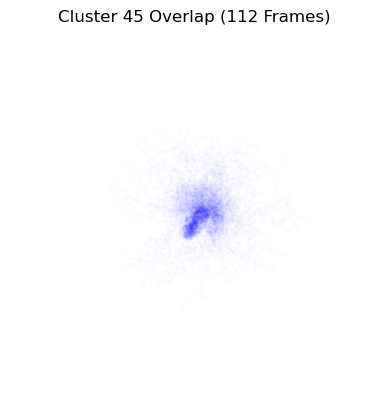

Aligning frames: 100%|█████████████████████████| 25/25 [00:00<00:00, 148.92it/s]


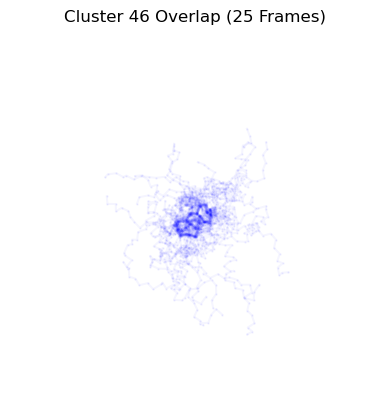

Aligning frames: 100%|█████████████████████████| 81/81 [00:00<00:00, 169.83it/s]


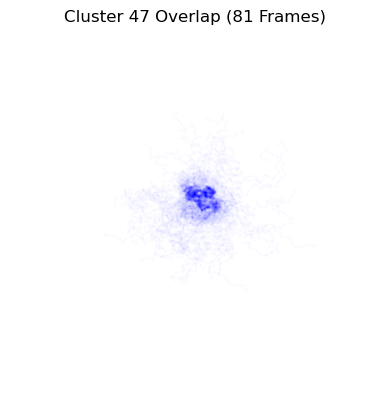

Aligning frames: 100%|█████████████████████████| 36/36 [00:00<00:00, 134.16it/s]


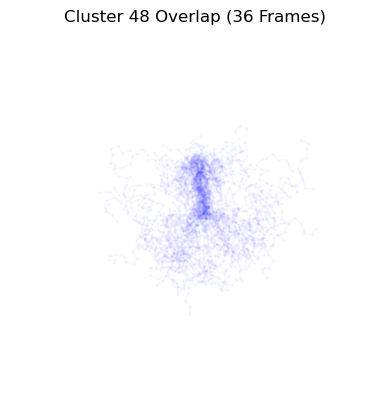

Aligning frames: 100%|█████████████████████████| 25/25 [00:00<00:00, 159.07it/s]


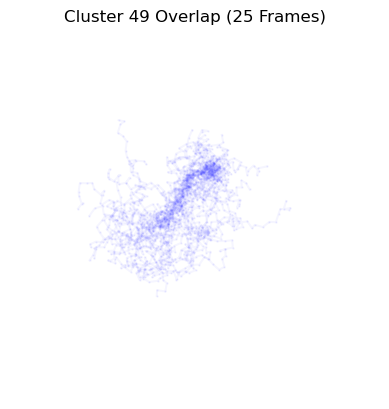

Aligning frames: 100%|█████████████████████████| 34/34 [00:00<00:00, 169.22it/s]


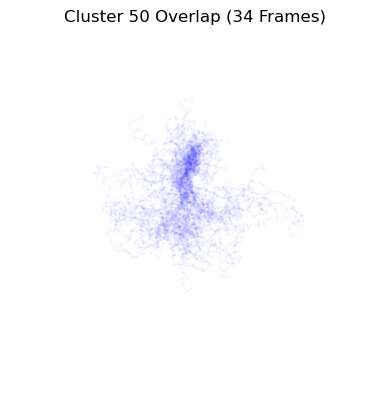

Aligning frames: 100%|██████████████████████████| 38/38 [00:00<00:00, 91.58it/s]


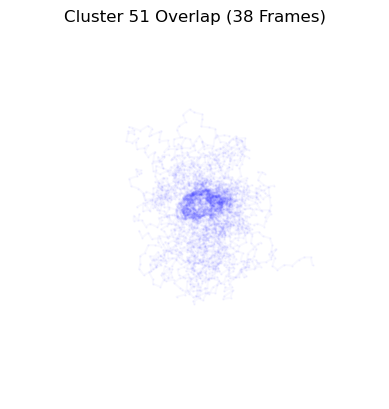

Aligning frames: 100%|█████████████████████████| 30/30 [00:00<00:00, 161.46it/s]


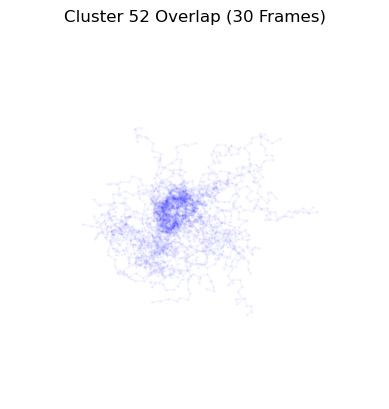

Aligning frames: 100%|█████████████████████████| 18/18 [00:00<00:00, 147.75it/s]


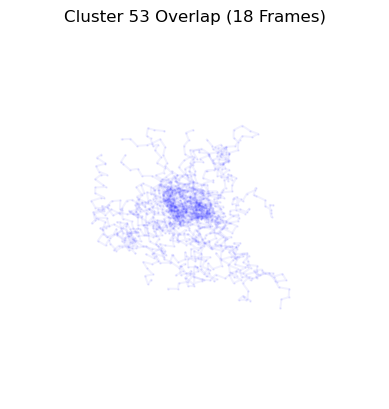

Aligning frames: 100%|█████████████████████████| 29/29 [00:00<00:00, 158.45it/s]


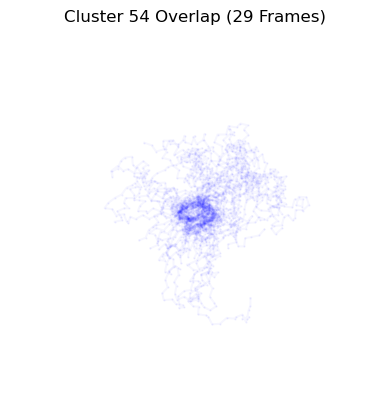

Aligning frames: 100%|█████████████████████████| 48/48 [00:00<00:00, 167.60it/s]


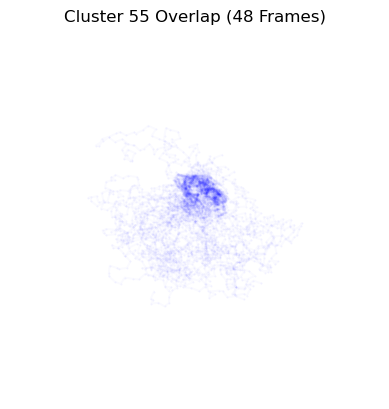

Aligning frames: 100%|█████████████████████████| 71/71 [00:00<00:00, 164.09it/s]


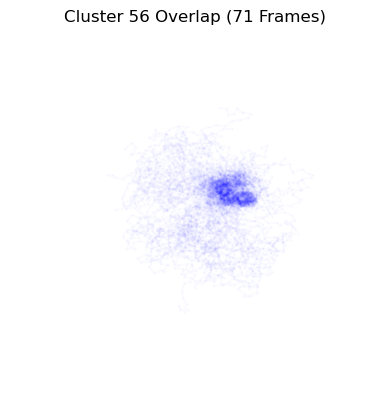

Aligning frames: 100%|███████████████████████| 197/197 [00:01<00:00, 138.20it/s]


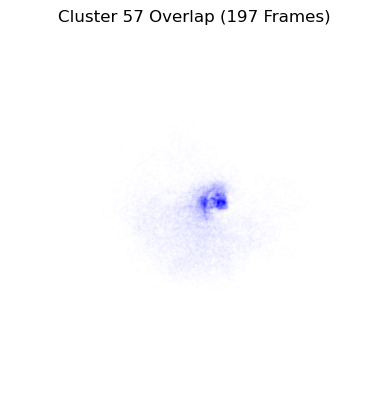

Aligning frames: 100%|███████████████████████| 240/240 [00:01<00:00, 141.06it/s]


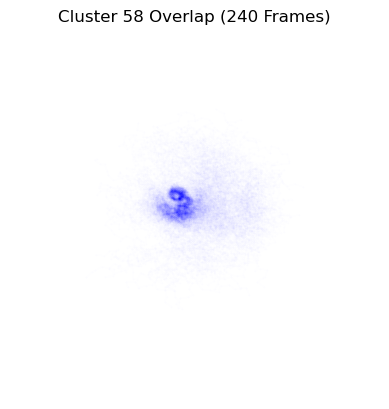

Aligning frames: 100%|███████████████████████| 131/131 [00:00<00:00, 151.11it/s]


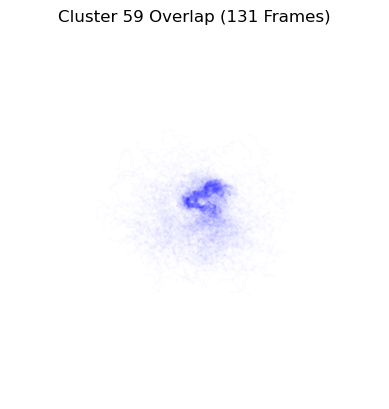

Aligning frames: 100%|█████████████████████████| 99/99 [00:00<00:00, 142.80it/s]


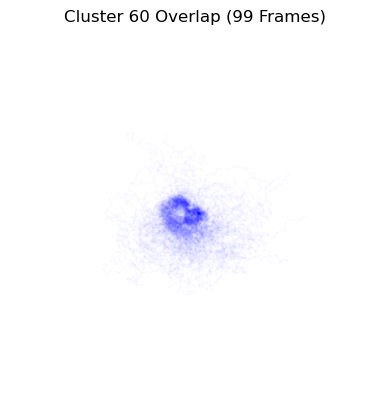

Aligning frames: 100%|███████████████████████| 218/218 [00:01<00:00, 132.25it/s]


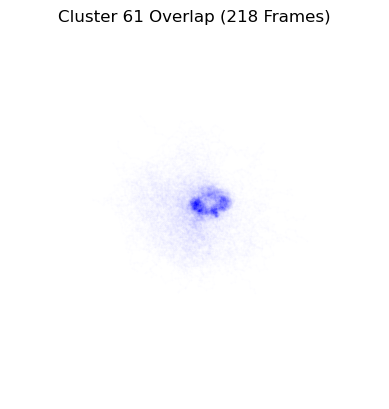

Aligning frames: 100%|███████████████████████| 189/189 [00:01<00:00, 137.64it/s]


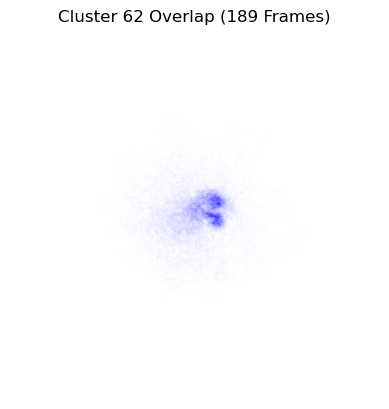

Aligning frames: 100%|███████████████████████| 129/129 [00:00<00:00, 175.42it/s]


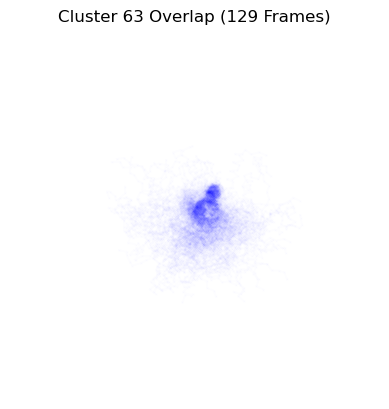

Aligning frames: 100%|███████████████████████| 180/180 [00:01<00:00, 126.50it/s]


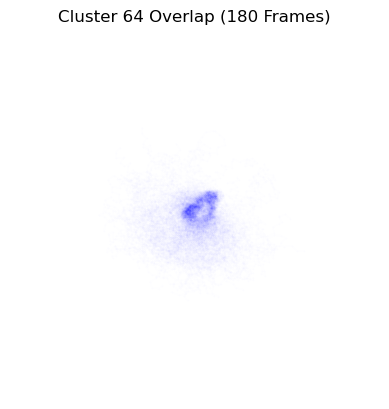

Aligning frames: 100%|███████████████████████| 163/163 [00:01<00:00, 159.28it/s]


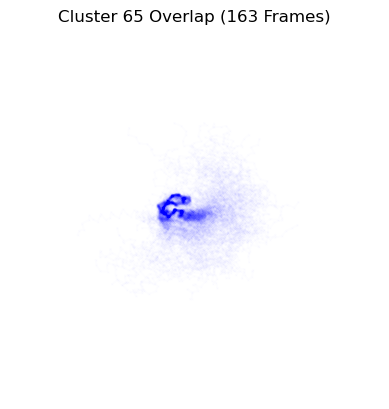

Aligning frames: 100%|█████████████████████████| 90/90 [00:00<00:00, 115.97it/s]


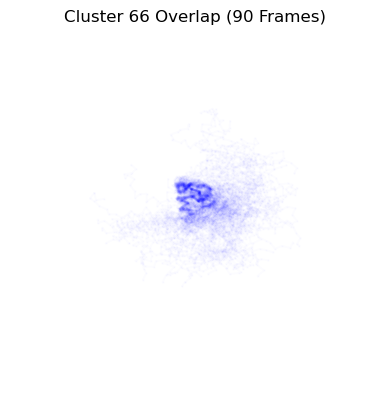

Aligning frames: 100%|███████████████████████| 141/141 [00:00<00:00, 156.54it/s]


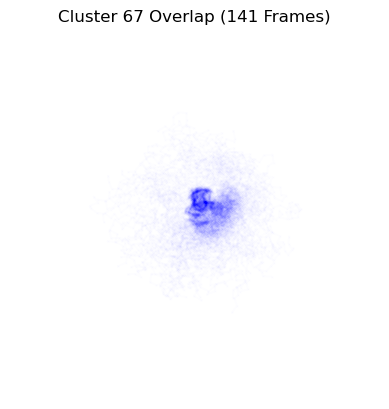

Aligning frames: 100%|█████████████████████████| 77/77 [00:00<00:00, 144.82it/s]


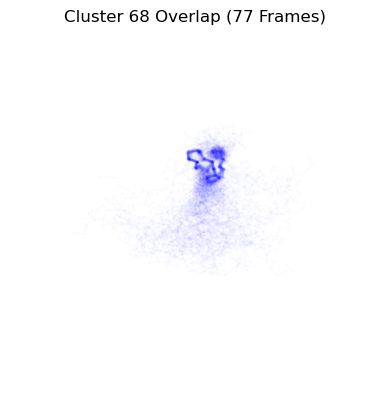

Aligning frames: 100%|███████████████████████| 135/135 [00:00<00:00, 144.16it/s]


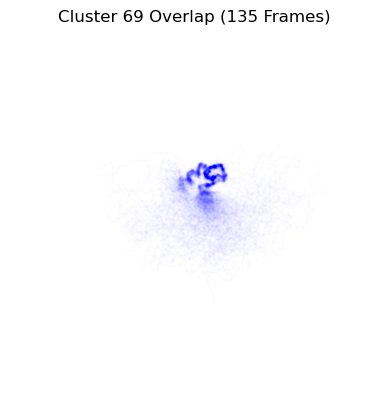

Aligning frames: 100%|█████████████████████████| 33/33 [00:00<00:00, 116.91it/s]


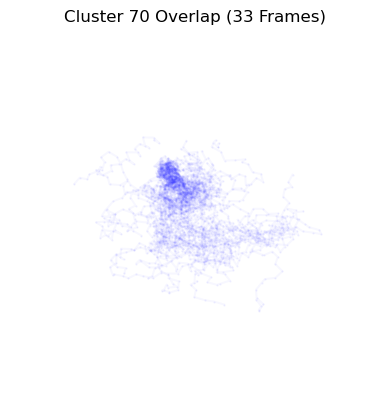

Aligning frames: 100%|█████████████████████████| 47/47 [00:00<00:00, 171.25it/s]


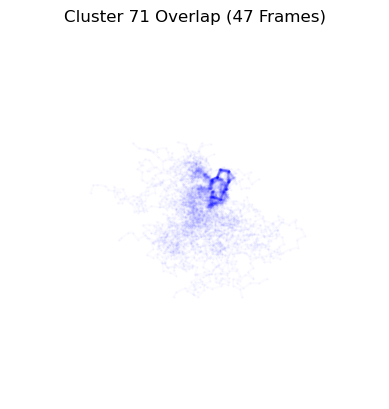

Aligning frames: 100%|█████████████████████████| 88/88 [00:00<00:00, 173.96it/s]


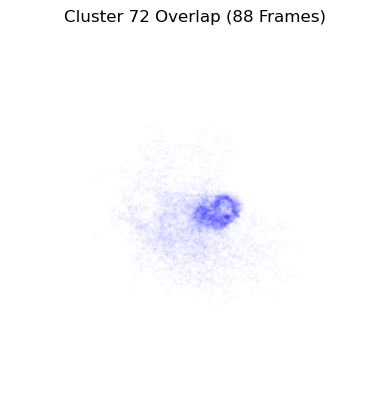

Aligning frames: 100%|██████████████████████████| 69/69 [00:00<00:00, 95.45it/s]


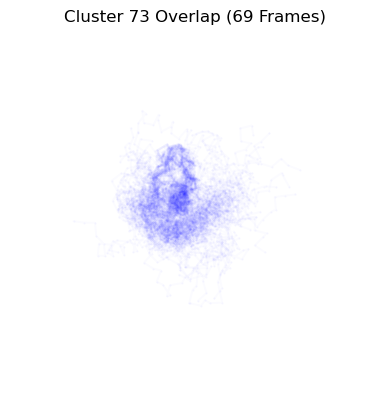

Aligning frames: 100%|███████████████████████| 151/151 [00:00<00:00, 157.10it/s]


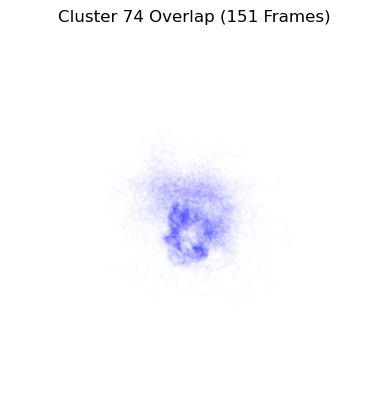

Aligning frames: 100%|███████████████████████| 159/159 [00:01<00:00, 131.34it/s]


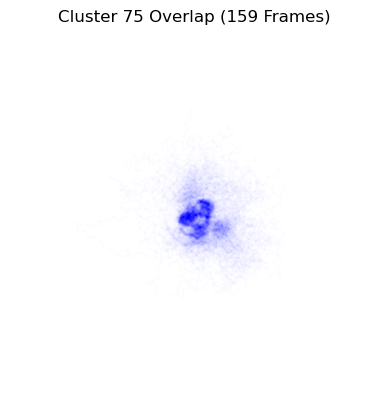

Aligning frames: 100%|███████████████████████| 150/150 [00:01<00:00, 147.22it/s]


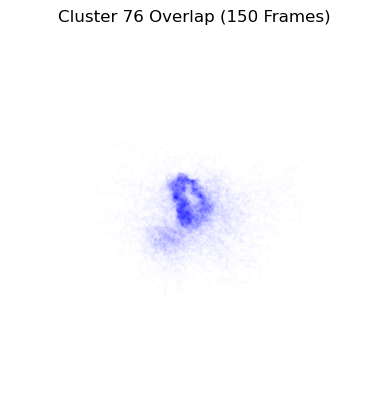

Aligning frames: 100%|███████████████████████| 186/186 [00:01<00:00, 127.76it/s]


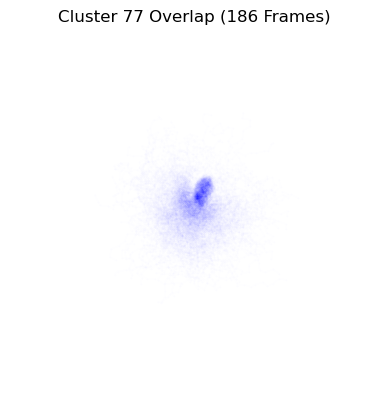

Aligning frames: 100%|███████████████████████| 161/161 [00:00<00:00, 161.70it/s]


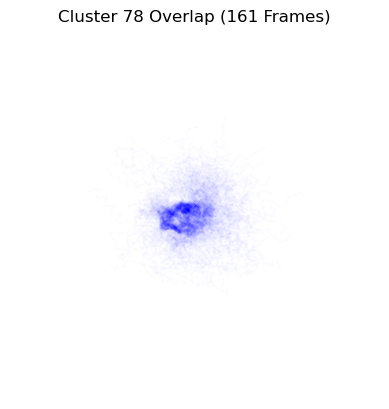

Aligning frames: 100%|█████████████████████████| 42/42 [00:00<00:00, 101.31it/s]


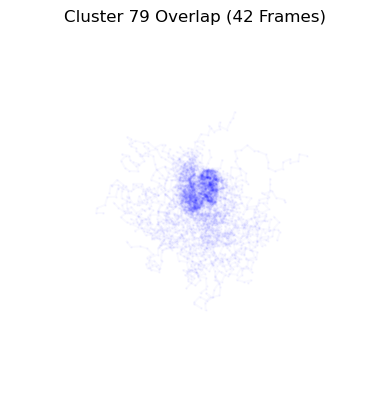

Aligning frames: 100%|█████████████████████████| 21/21 [00:00<00:00, 152.12it/s]


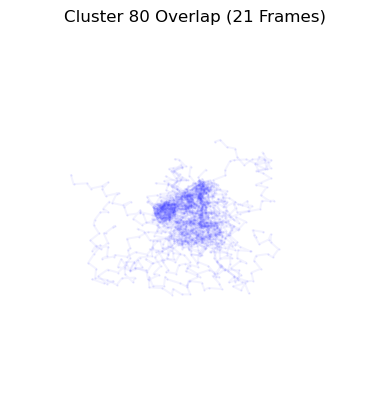

Aligning frames: 100%|███████████████████████| 268/268 [00:01<00:00, 149.89it/s]


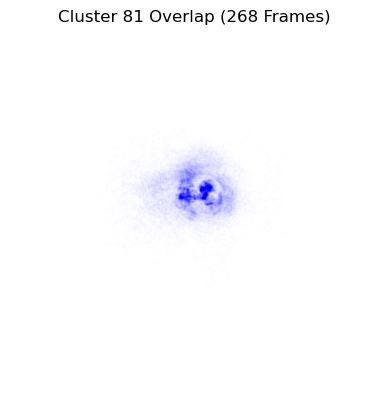

Aligning frames: 100%|███████████████████████| 102/102 [00:00<00:00, 145.09it/s]


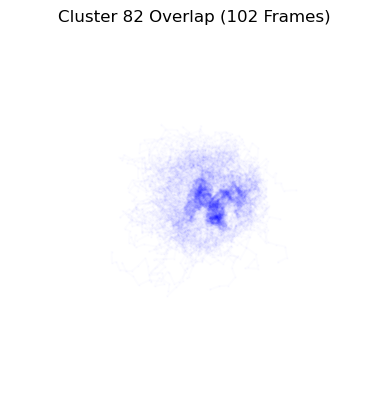

Aligning frames: 100%|█████████████████████████| 67/67 [00:00<00:00, 147.23it/s]


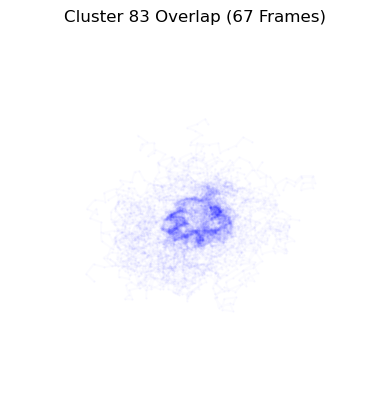

Aligning frames: 100%|███████████████████████| 177/177 [00:01<00:00, 130.02it/s]


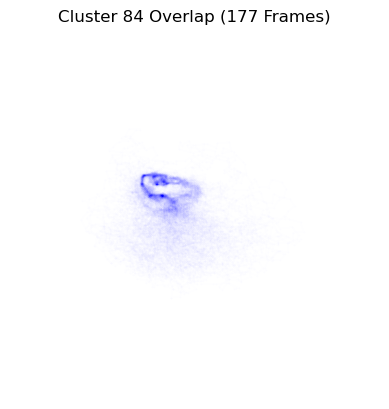

Aligning frames: 100%|█████████████████████████| 51/51 [00:00<00:00, 129.37it/s]


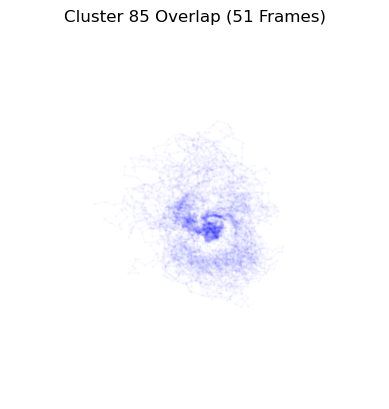

Aligning frames: 100%|███████████████████████| 167/167 [00:01<00:00, 156.43it/s]


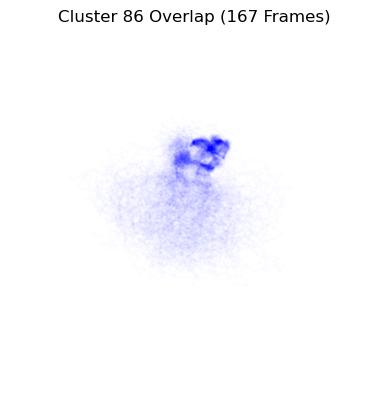

Aligning frames: 100%|███████████████████████| 258/258 [00:01<00:00, 177.09it/s]


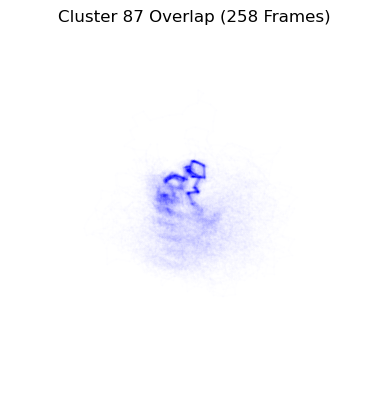

Aligning frames: 100%|█████████████████████████| 75/75 [00:00<00:00, 127.40it/s]


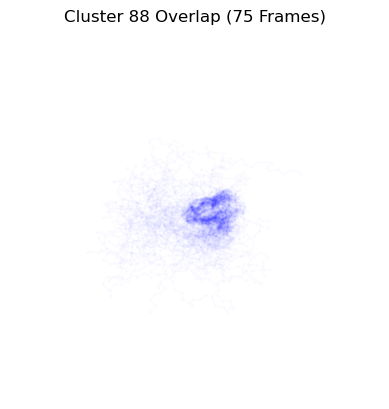

Aligning frames: 100%|███████████████████████| 195/195 [00:01<00:00, 176.71it/s]


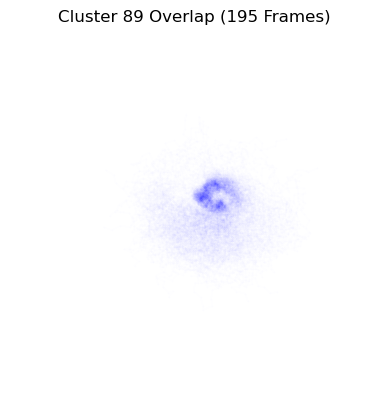

Aligning frames: 100%|███████████████████████| 108/108 [00:00<00:00, 119.21it/s]


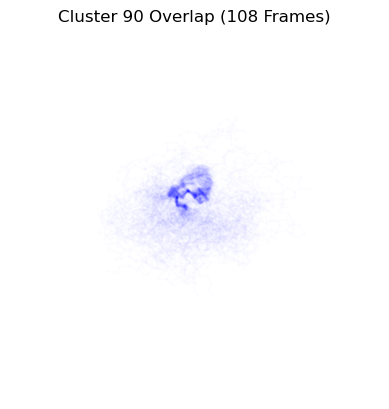

Aligning frames: 100%|███████████████████████| 129/129 [00:00<00:00, 152.32it/s]


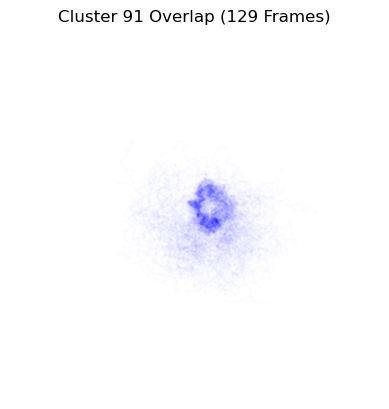

Aligning frames: 100%|█████████████████████████| 65/65 [00:00<00:00, 138.50it/s]


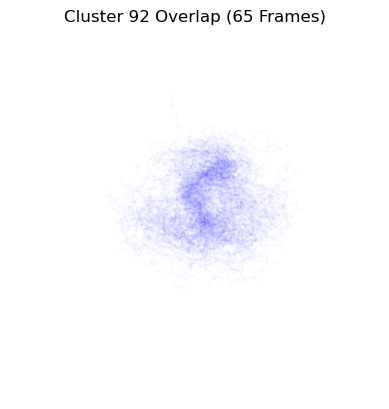

Aligning frames: 100%|██████████████████████████| 68/68 [00:00<00:00, 93.90it/s]


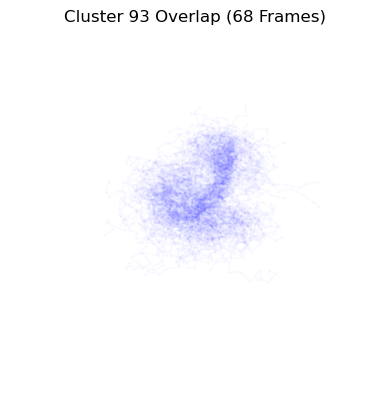

Aligning frames: 100%|█████████████████████████| 88/88 [00:00<00:00, 148.77it/s]


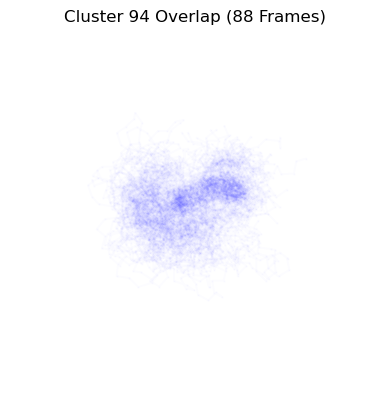

Aligning frames: 100%|█████████████████████████| 55/55 [00:00<00:00, 172.57it/s]


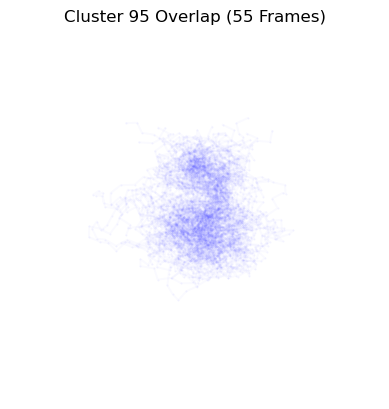

Aligning frames: 100%|███████████████████████| 104/104 [00:00<00:00, 162.68it/s]


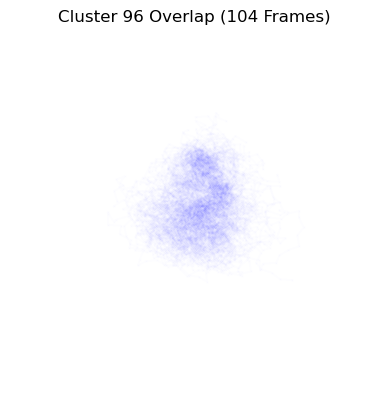

Aligning frames: 100%|██████████████████████████| 36/36 [00:00<00:00, 54.93it/s]


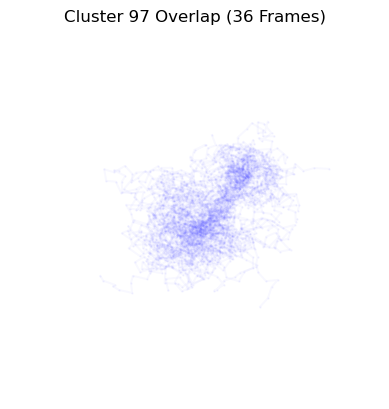

Aligning frames: 100%|█████████████████████████| 36/36 [00:00<00:00, 166.31it/s]


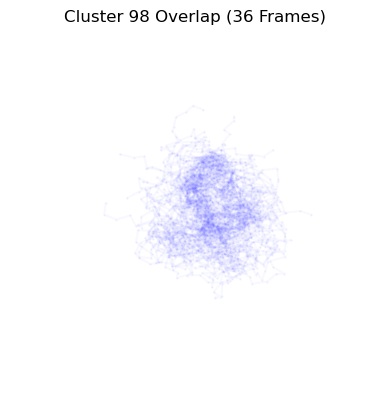

Aligning frames: 100%|█████████████████████████| 19/19 [00:00<00:00, 124.94it/s]


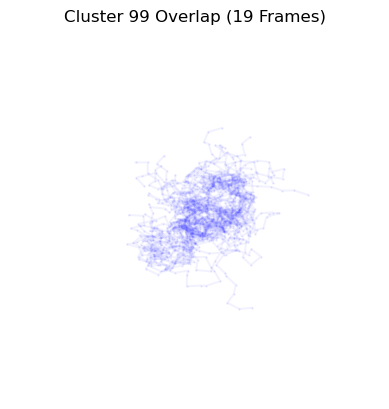

Aligning frames: 100%|█████████████████████████| 49/49 [00:00<00:00, 170.79it/s]


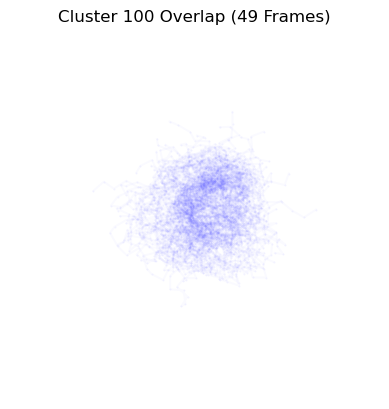

Aligning frames: 100%|█████████████████████████| 41/41 [00:00<00:00, 118.10it/s]


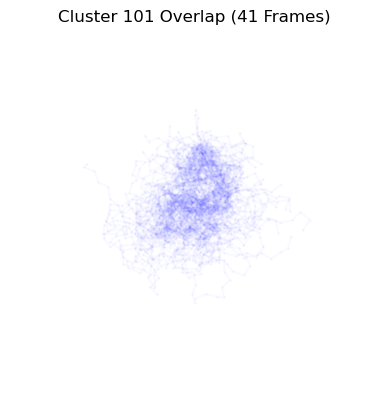

Aligning frames: 100%|█████████████████████████| 87/87 [00:00<00:00, 153.34it/s]


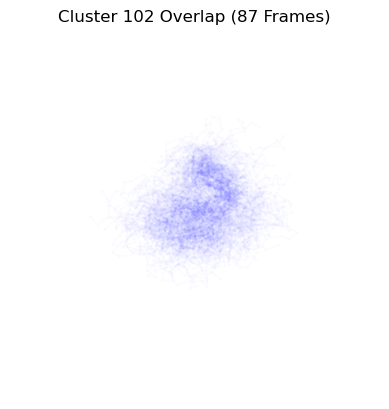

Aligning frames: 100%|█████████████████████████| 30/30 [00:00<00:00, 162.49it/s]


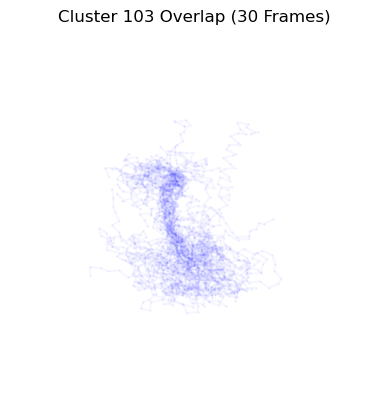

Aligning frames: 100%|█████████████████████████| 19/19 [00:00<00:00, 115.63it/s]


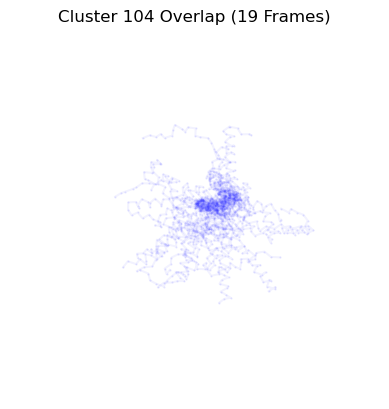

Aligning frames: 100%|███████████████████████████| 8/8 [00:00<00:00, 123.74it/s]


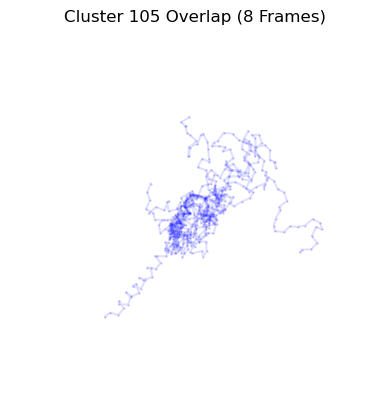

Aligning frames: 100%|█████████████████████████| 66/66 [00:00<00:00, 174.61it/s]


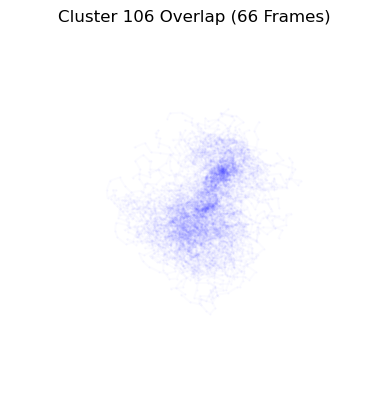

Aligning frames: 100%|█████████████████████████| 81/81 [00:00<00:00, 141.28it/s]


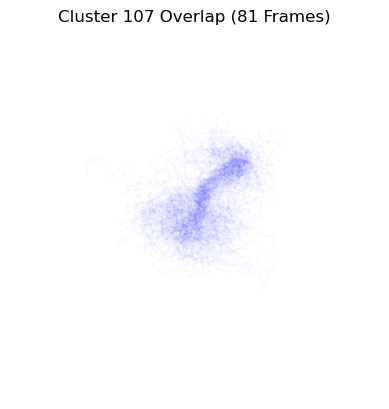

Aligning frames: 100%|███████████████████████| 120/120 [00:01<00:00, 114.01it/s]


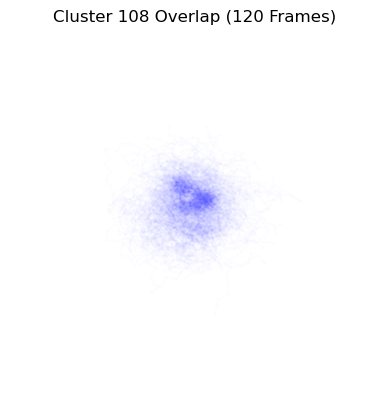

Aligning frames: 100%|█████████████████████████| 73/73 [00:00<00:00, 175.57it/s]


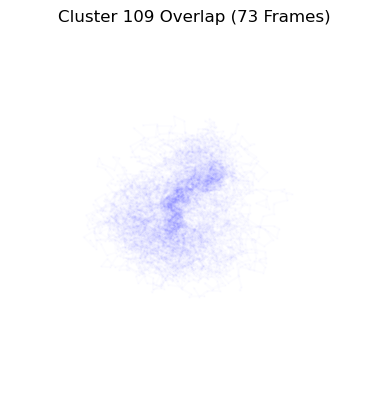

Aligning frames: 100%|█████████████████████████| 67/67 [00:00<00:00, 134.85it/s]


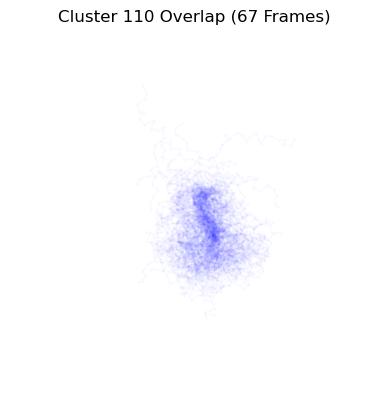

Aligning frames: 100%|█████████████████████████| 89/89 [00:00<00:00, 133.80it/s]


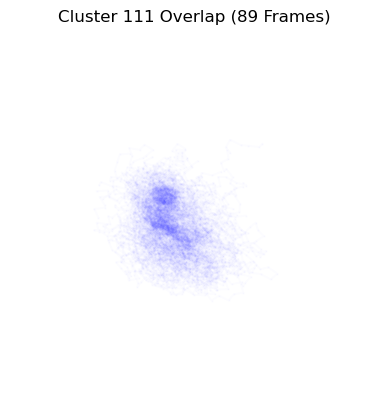

Aligning frames: 100%|███████████████████████████| 9/9 [00:00<00:00, 120.74it/s]


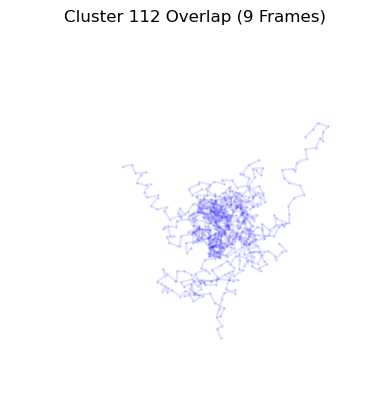

Aligning frames: 100%|███████████████████████| 120/120 [00:00<00:00, 146.87it/s]


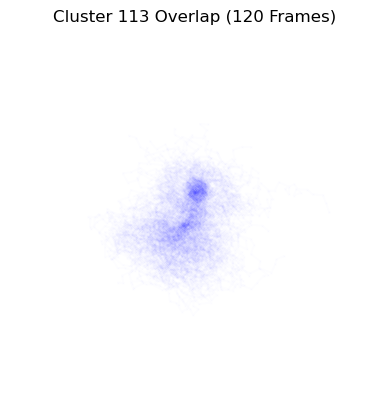

Aligning frames: 100%|█████████████████████████| 77/77 [00:00<00:00, 160.30it/s]


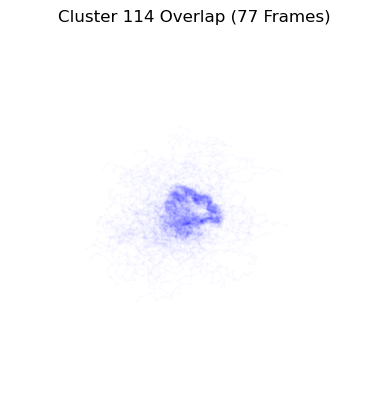

Aligning frames: 100%|██████████████████████████| 46/46 [00:00<00:00, 77.69it/s]


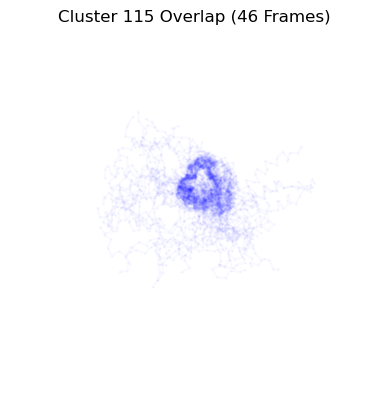

Aligning frames: 100%|█████████████████████████| 44/44 [00:00<00:00, 144.14it/s]


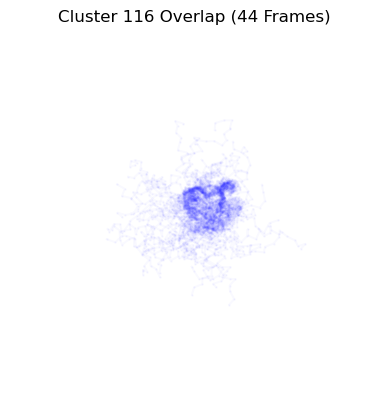

Aligning frames: 100%|█████████████████████████| 81/81 [00:00<00:00, 162.50it/s]


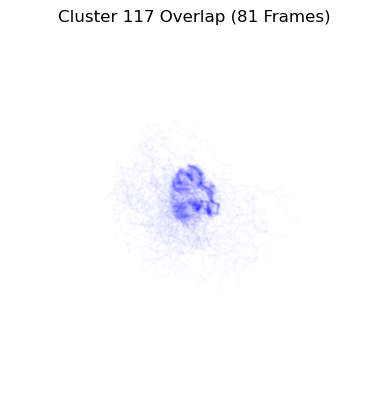

Aligning frames: 100%|█████████████████████████| 93/93 [00:00<00:00, 143.75it/s]


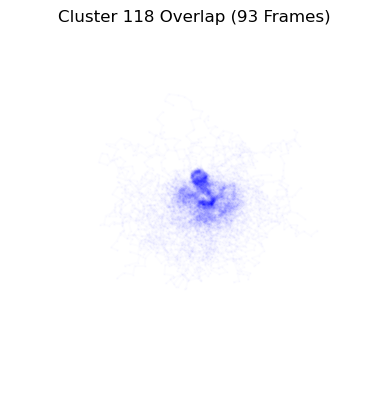

Aligning frames: 100%|█████████████████████████| 67/67 [00:00<00:00, 117.86it/s]


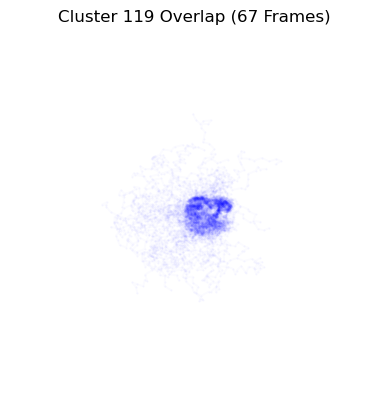

Aligning frames: 100%|███████████████████████| 106/106 [00:00<00:00, 175.85it/s]


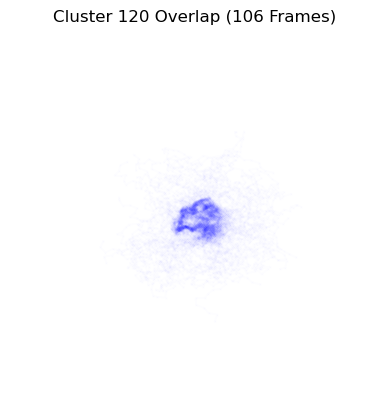

Aligning frames: 100%|█████████████████████████| 21/21 [00:00<00:00, 153.98it/s]


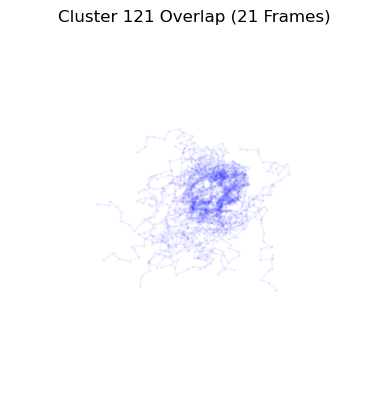

Aligning frames: 100%|███████████████████████████| 9/9 [00:00<00:00, 115.75it/s]


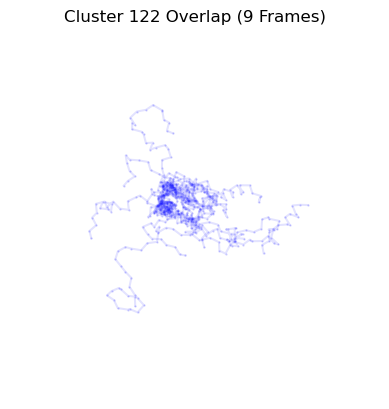

Aligning frames: 100%|███████████████████████████| 5/5 [00:00<00:00, 143.79it/s]


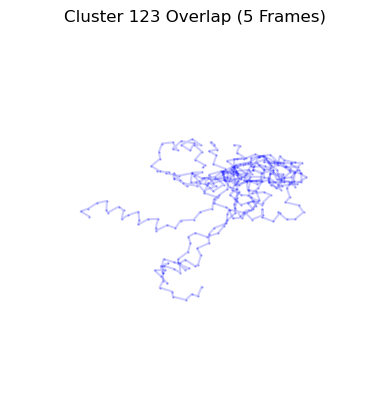

Aligning frames: 100%|█████████████████████████| 18/18 [00:00<00:00, 150.27it/s]


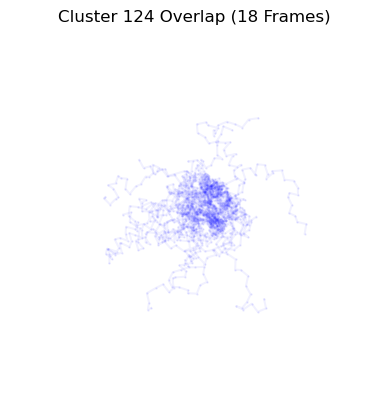

Aligning frames: 100%|█████████████████████████| 25/25 [00:00<00:00, 157.90it/s]


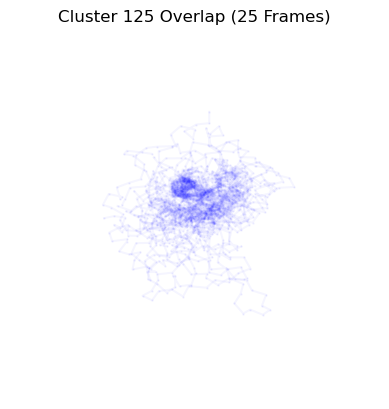

Aligning frames: 100%|█████████████████████████| 62/62 [00:00<00:00, 164.83it/s]


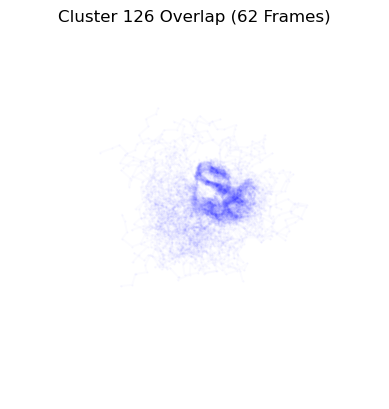

Aligning frames: 100%|██████████████████████████| 39/39 [00:00<00:00, 96.81it/s]


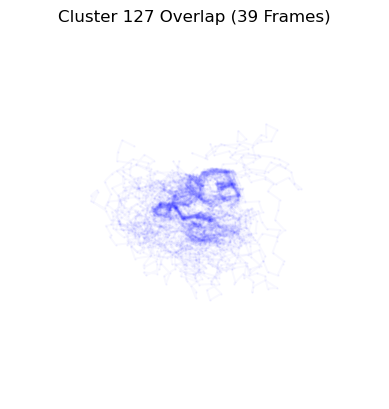

Aligning frames: 100%|█████████████████████████| 42/42 [00:00<00:00, 151.39it/s]


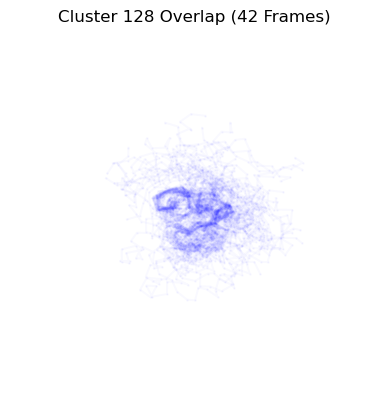

Aligning frames: 100%|█████████████████████████| 20/20 [00:00<00:00, 127.93it/s]


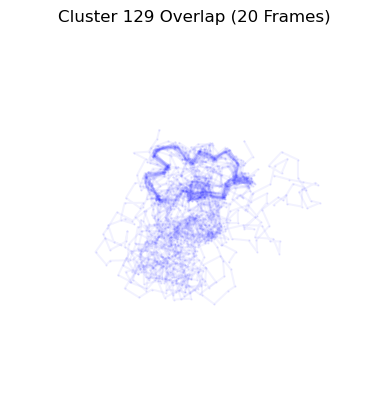

Aligning frames: 100%|█████████████████████████| 30/30 [00:00<00:00, 169.55it/s]


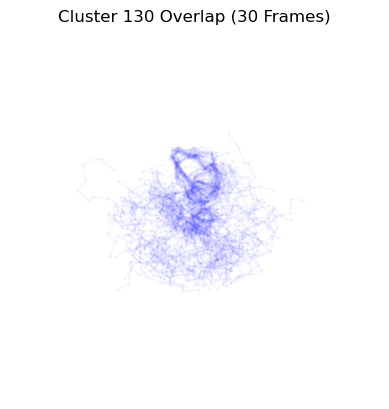

Aligning frames: 100%|███████████████████████| 110/110 [00:00<00:00, 147.33it/s]


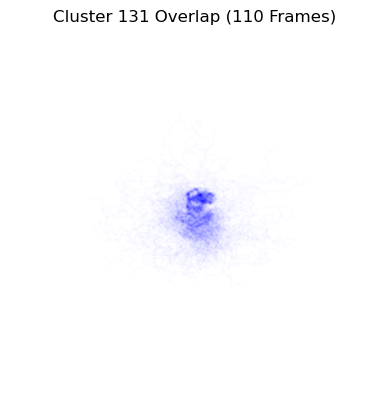

Aligning frames: 100%|███████████████████████| 124/124 [00:00<00:00, 142.26it/s]


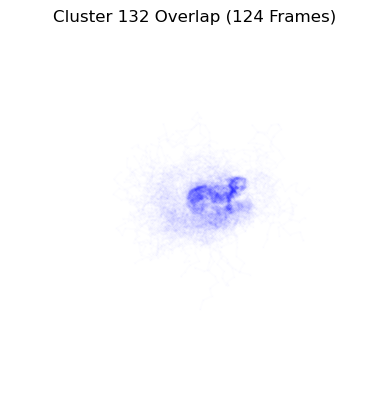

Aligning frames: 100%|█████████████████████████| 20/20 [00:00<00:00, 131.37it/s]


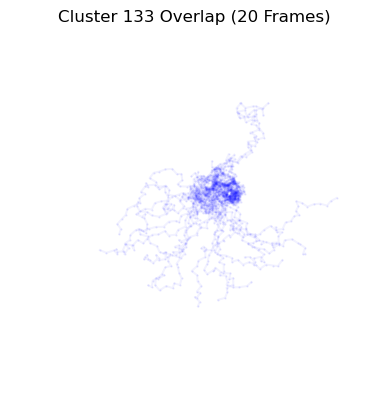

Aligning frames: 100%|█████████████████████████| 41/41 [00:00<00:00, 160.60it/s]


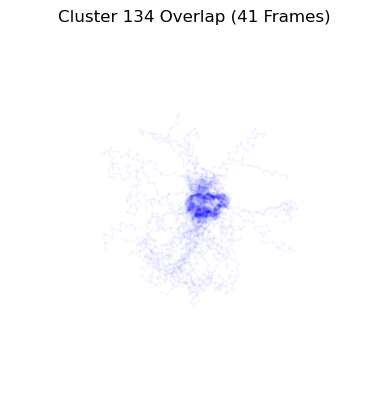

Aligning frames: 100%|█████████████████████████| 37/37 [00:00<00:00, 166.40it/s]


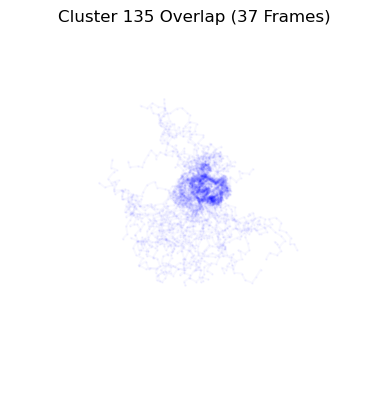

Aligning frames: 100%|█████████████████████████| 47/47 [00:00<00:00, 141.76it/s]


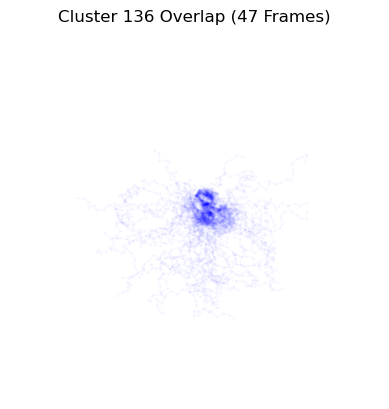

Aligning frames: 100%|█████████████████████████| 33/33 [00:00<00:00, 164.80it/s]


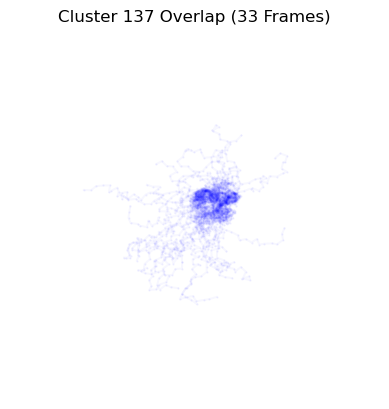

Aligning frames: 100%|██████████████████████████| 55/55 [00:00<00:00, 92.84it/s]


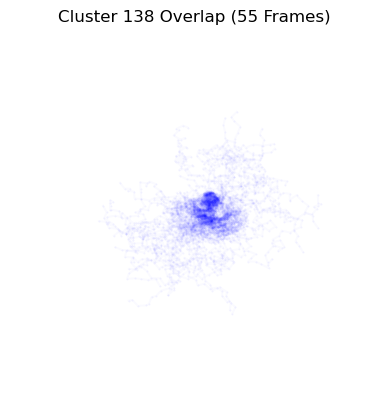

Aligning frames: 100%|█████████████████████████| 51/51 [00:00<00:00, 143.63it/s]


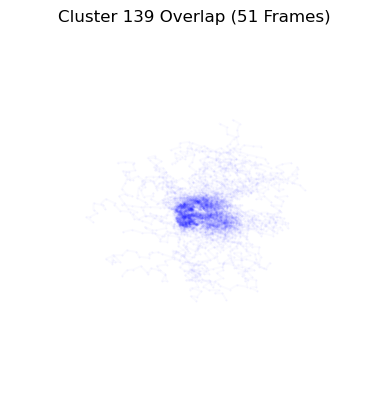

Aligning frames: 100%|█████████████████████████| 20/20 [00:00<00:00, 141.05it/s]


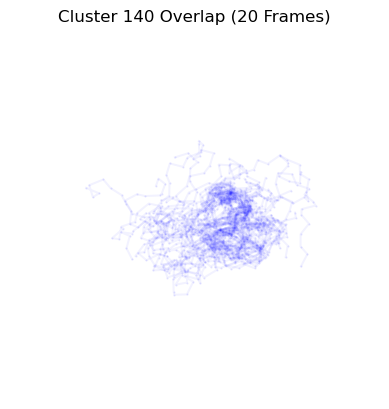

Aligning frames: 100%|█████████████████████████| 33/33 [00:00<00:00, 100.11it/s]


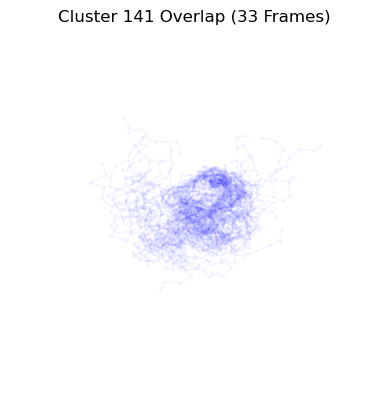

Aligning frames: 100%|█████████████████████████| 13/13 [00:00<00:00, 142.24it/s]


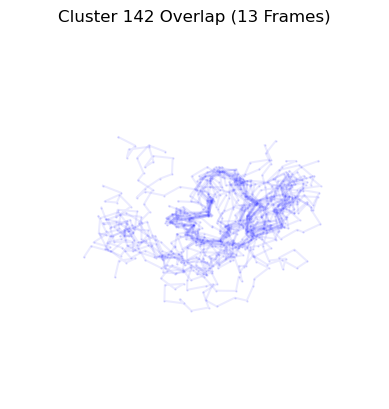

Aligning frames: 100%|█████████████████████████| 25/25 [00:00<00:00, 164.86it/s]


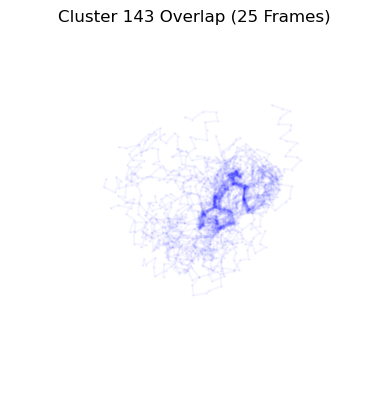

Aligning frames: 100%|█████████████████████████| 24/24 [00:00<00:00, 103.53it/s]


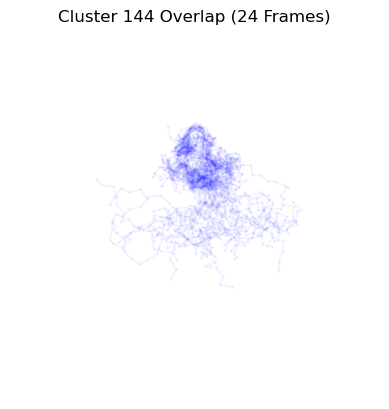

Aligning frames: 100%|█████████████████████████| 43/43 [00:00<00:00, 170.91it/s]


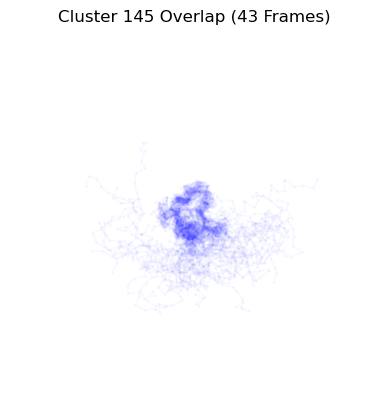

Aligning frames: 100%|██████████████████████████| 50/50 [00:00<00:00, 91.21it/s]


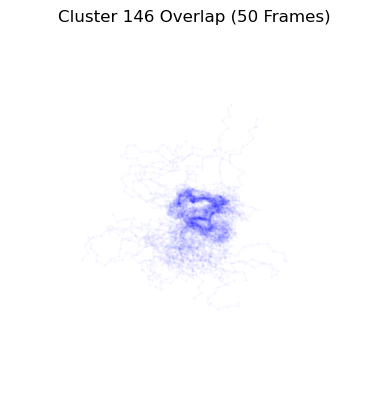

Aligning frames: 100%|█████████████████████████| 34/34 [00:00<00:00, 154.97it/s]


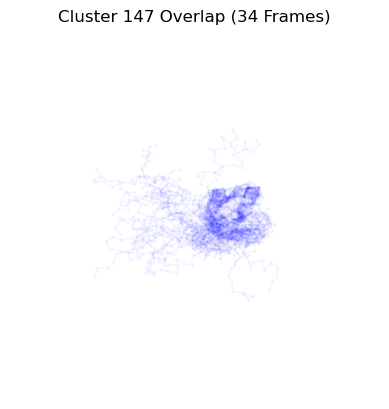

Aligning frames: 100%|█████████████████████████| 31/31 [00:00<00:00, 158.74it/s]


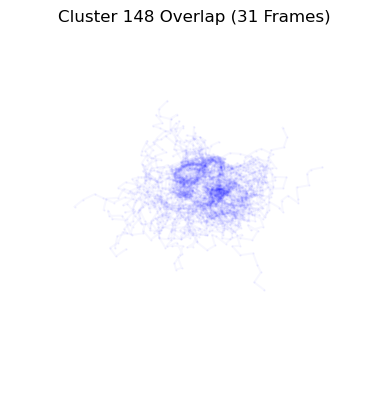

Aligning frames: 100%|█████████████████████████| 30/30 [00:00<00:00, 163.16it/s]


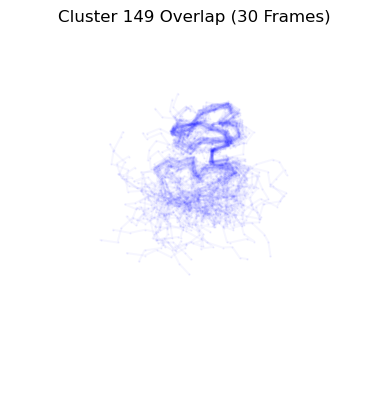

Aligning frames: 100%|█████████████████████████| 10/10 [00:00<00:00, 101.08it/s]


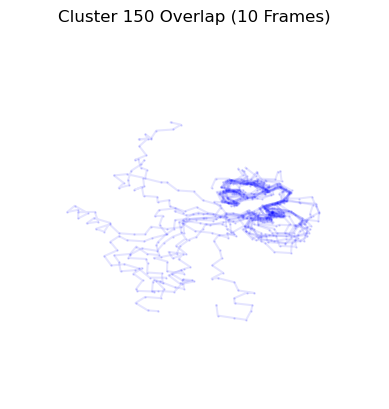

Aligning frames: 100%|█████████████████████████| 27/27 [00:00<00:00, 163.08it/s]


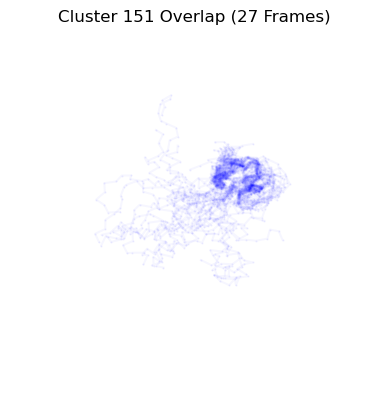

Aligning frames: 100%|█████████████████████████| 36/36 [00:00<00:00, 123.73it/s]


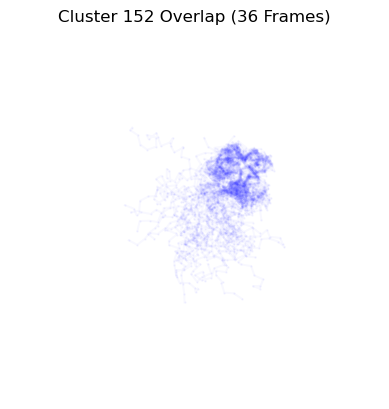

Aligning frames: 100%|█████████████████████████| 43/43 [00:00<00:00, 161.30it/s]


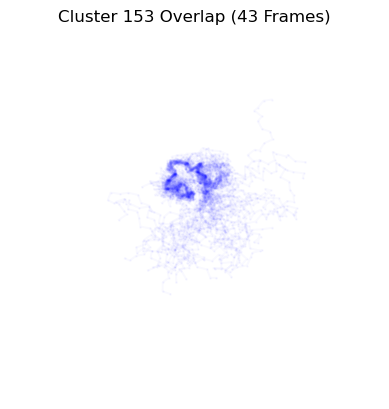

Aligning frames: 100%|█████████████████████████| 16/16 [00:00<00:00, 110.43it/s]


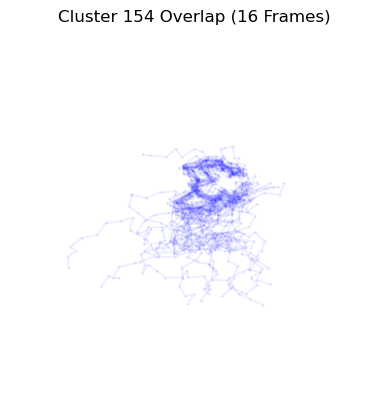

Aligning frames: 100%|█████████████████████████| 46/46 [00:00<00:00, 100.39it/s]


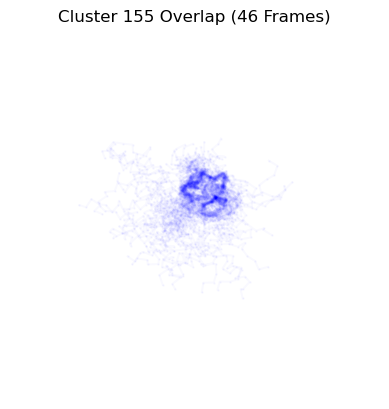

Aligning frames: 100%|█████████████████████████| 14/14 [00:00<00:00, 133.75it/s]


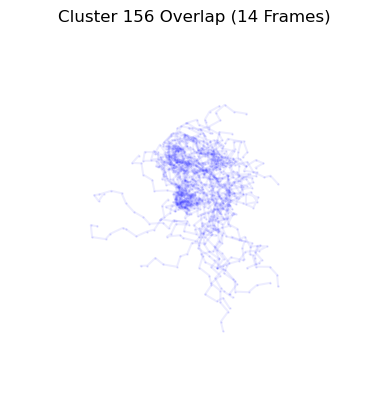

Aligning frames: 100%|███████████████████████████| 6/6 [00:00<00:00, 139.17it/s]


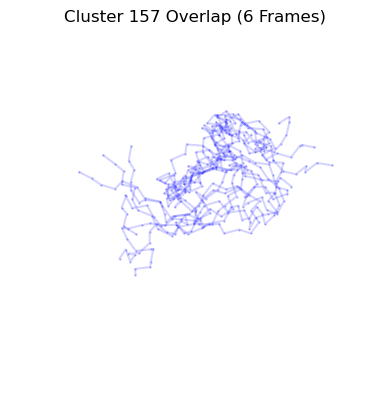

Aligning frames: 100%|█████████████████████████| 15/15 [00:00<00:00, 156.75it/s]


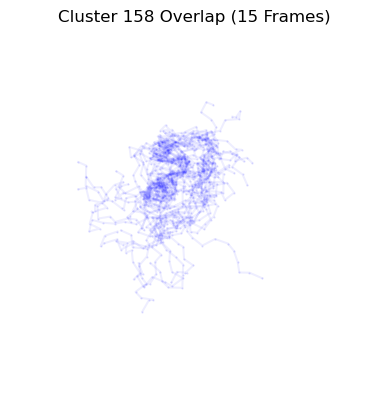

Aligning frames: 100%|█████████████████████████| 15/15 [00:00<00:00, 135.28it/s]


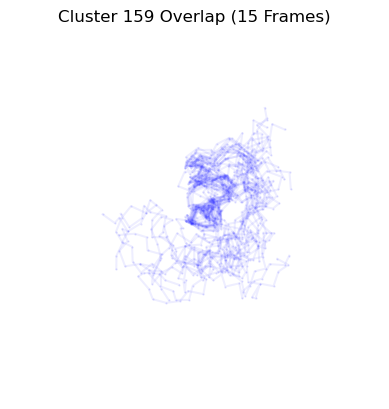

Aligning frames: 100%|████████████████████████████| 5/5 [00:00<00:00, 98.79it/s]


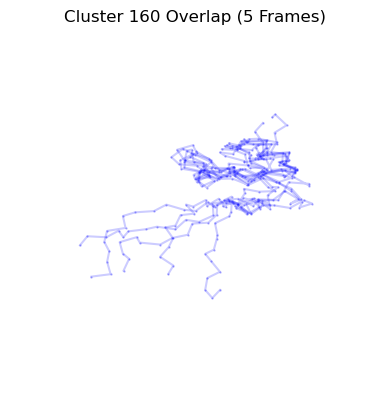

Aligning frames: 100%|█████████████████████████| 45/45 [00:00<00:00, 164.78it/s]


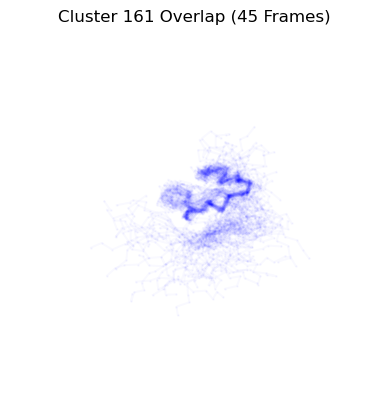

Aligning frames: 100%|█████████████████████████| 11/11 [00:00<00:00, 149.29it/s]


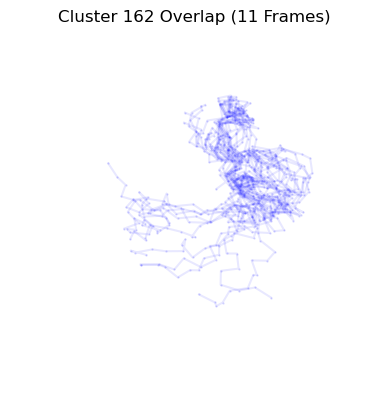

Aligning frames: 100%|███████████████████████████| 3/3 [00:00<00:00, 127.64it/s]


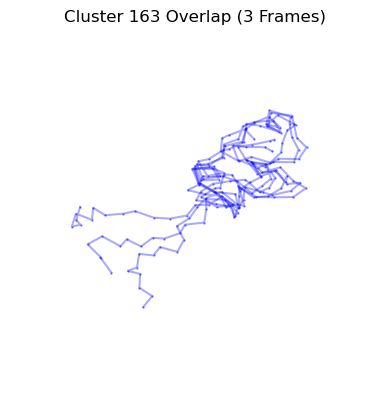

Aligning frames: 100%|████████████████████████████| 6/6 [00:00<00:00, 99.42it/s]


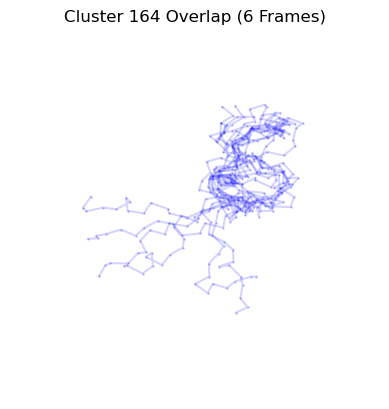

Aligning frames: 100%|███████████████████████████| 8/8 [00:00<00:00, 142.96it/s]


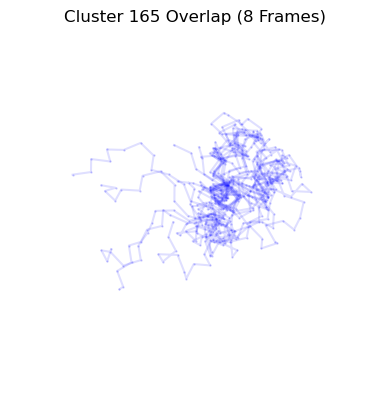

Aligning frames: 100%|█████████████████████████| 16/16 [00:00<00:00, 159.93it/s]


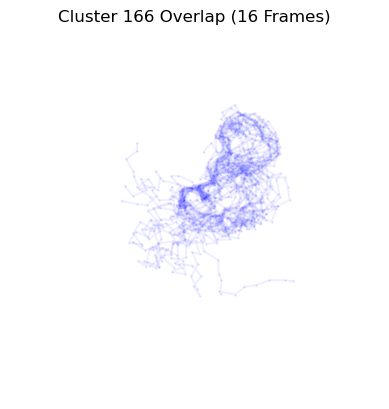

Aligning frames: 100%|██████████████████████████| 12/12 [00:00<00:00, 35.14it/s]


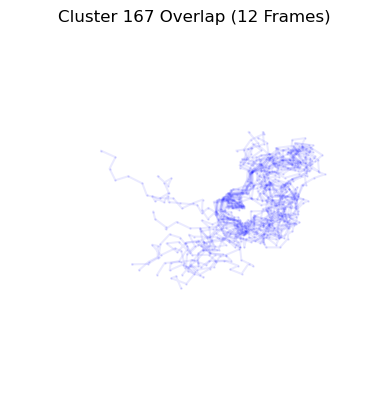

Aligning frames: 100%|██████████████████████████| 18/18 [00:00<00:00, 98.05it/s]


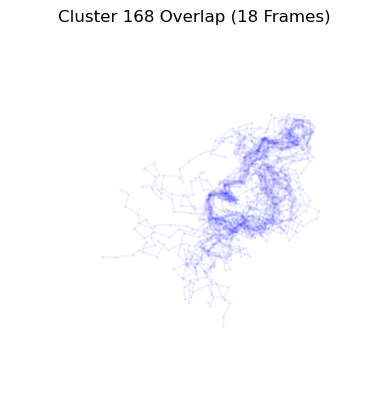

Aligning frames: 100%|███████████████████████████| 5/5 [00:00<00:00, 152.58it/s]


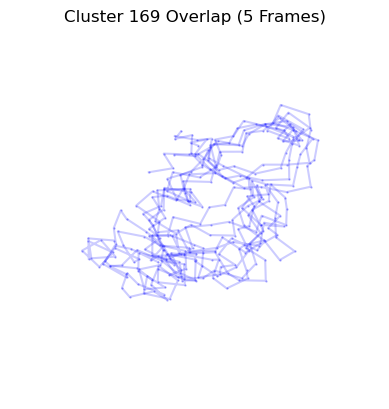

Aligning frames: 100%|█████████████████████████| 18/18 [00:00<00:00, 151.08it/s]


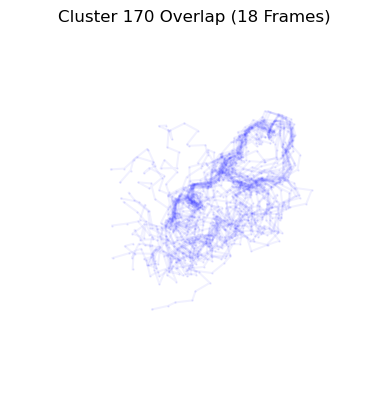

Aligning frames: 100%|█████████████████████████| 11/11 [00:00<00:00, 100.99it/s]


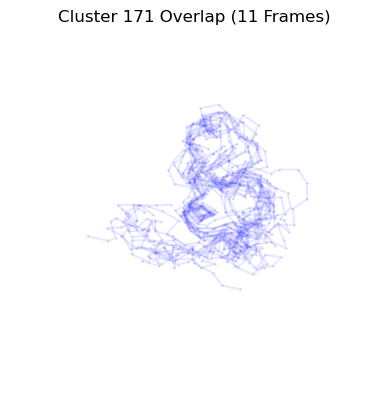

Aligning frames: 100%|███████████████████████████| 4/4 [00:00<00:00, 106.89it/s]


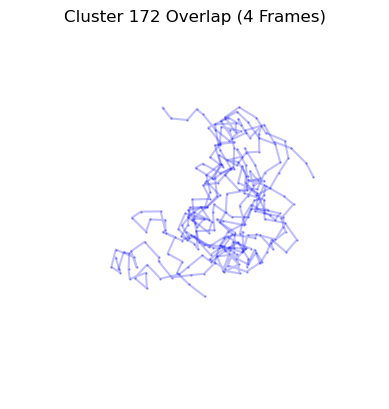

Aligning frames: 100%|███████████████████████████| 9/9 [00:00<00:00, 159.99it/s]


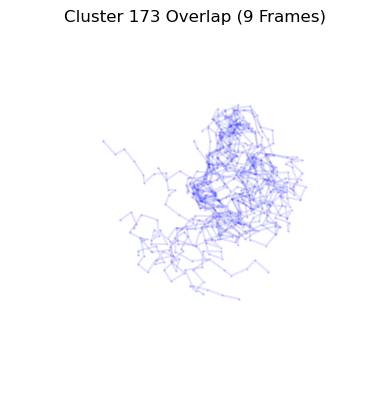

Aligning frames: 100%|█████████████████████████| 17/17 [00:00<00:00, 154.77it/s]


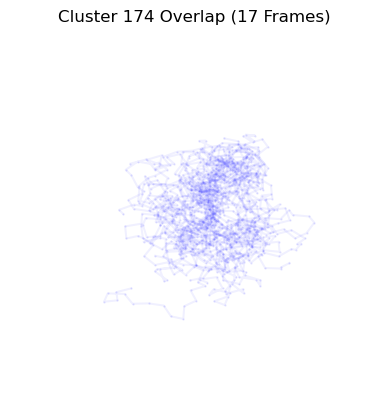

Aligning frames: 100%|█████████████████████████| 77/77 [00:00<00:00, 129.44it/s]


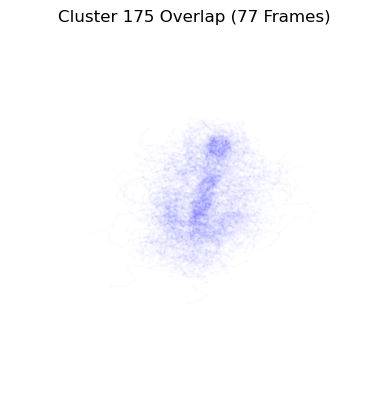

Aligning frames: 100%|█████████████████████████| 39/39 [00:00<00:00, 107.63it/s]


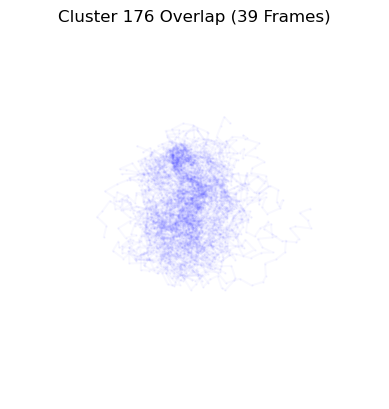

Aligning frames: 100%|█████████████████████████| 19/19 [00:00<00:00, 144.55it/s]


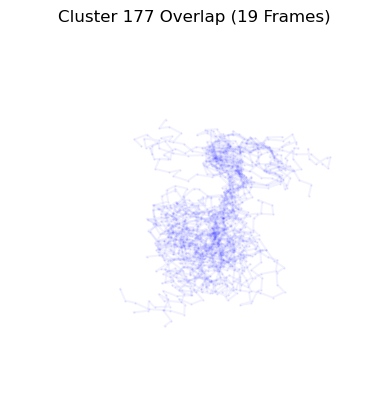

Aligning frames: 100%|█████████████████████████| 37/37 [00:00<00:00, 131.83it/s]


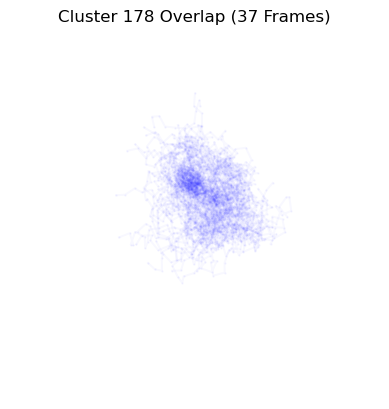

Aligning frames: 100%|████████████████████████████| 7/7 [00:00<00:00, 29.83it/s]


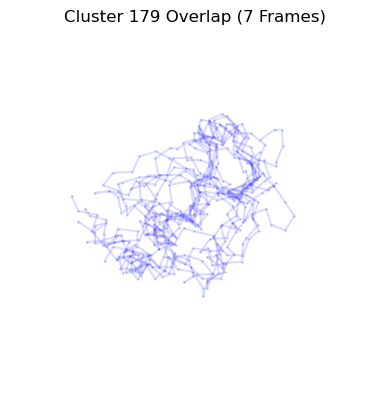

Aligning frames: 100%|███████████████████████████| 6/6 [00:00<00:00, 146.57it/s]


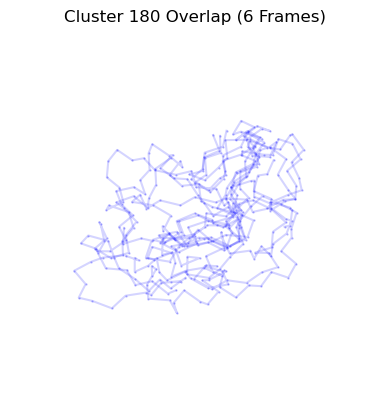

Aligning frames: 100%|████████████████████████████| 3/3 [00:00<00:00, 88.45it/s]


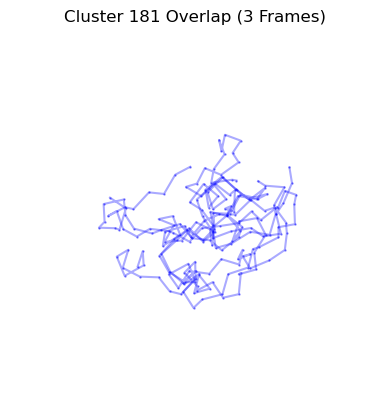

Aligning frames: 100%|█████████████████████████| 15/15 [00:00<00:00, 144.34it/s]


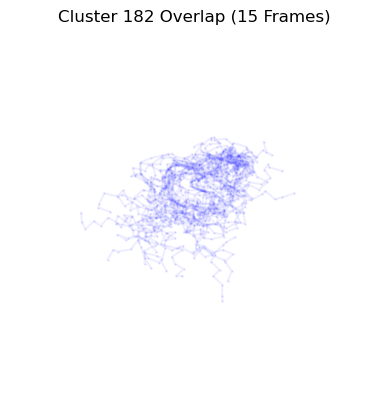

Aligning frames: 100%|█████████████████████████| 37/37 [00:00<00:00, 165.53it/s]


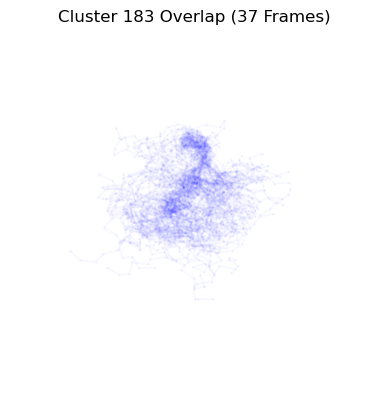

Aligning frames: 100%|█████████████████████████| 33/33 [00:00<00:00, 150.17it/s]


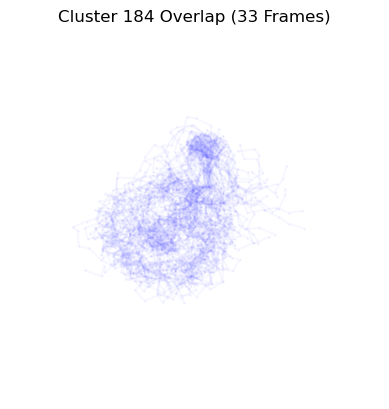

Aligning frames: 100%|█████████████████████████| 36/36 [00:00<00:00, 127.11it/s]


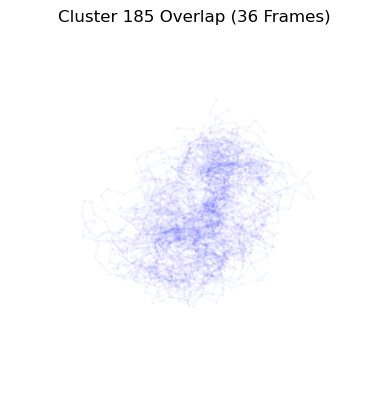

Aligning frames: 100%|█████████████████████████| 58/58 [00:00<00:00, 165.56it/s]


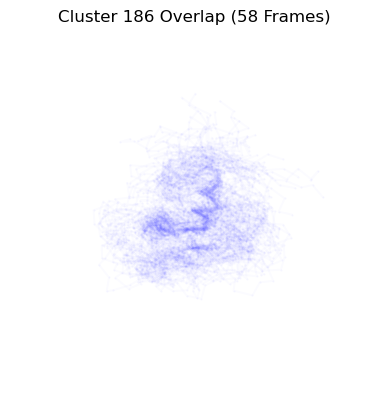

Aligning frames: 100%|█████████████████████████| 23/23 [00:00<00:00, 101.36it/s]


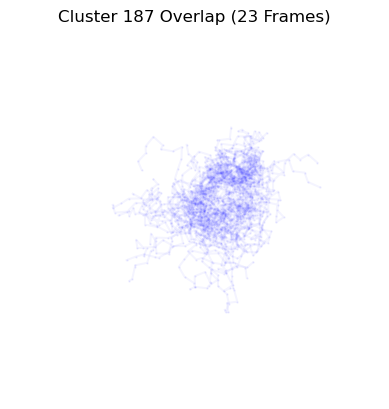

Aligning frames: 100%|██████████████████████████| 32/32 [00:00<00:00, 88.38it/s]


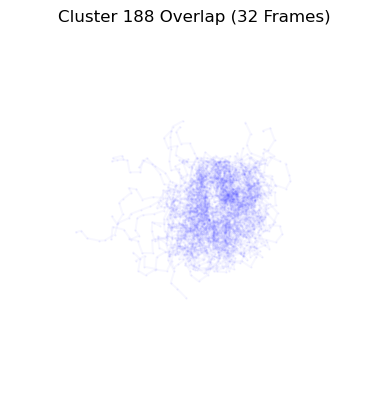

Aligning frames: 100%|█████████████████████████| 32/32 [00:00<00:00, 128.01it/s]


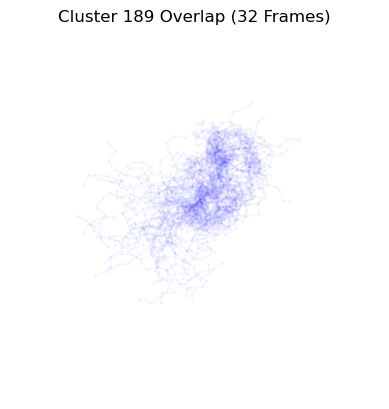

Aligning frames: 100%|█████████████████████████| 15/15 [00:00<00:00, 156.71it/s]


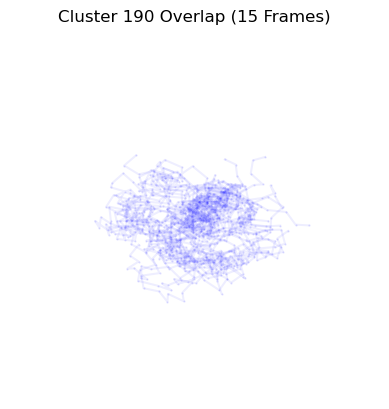

Aligning frames: 100%|█████████████████████████| 39/39 [00:00<00:00, 161.12it/s]


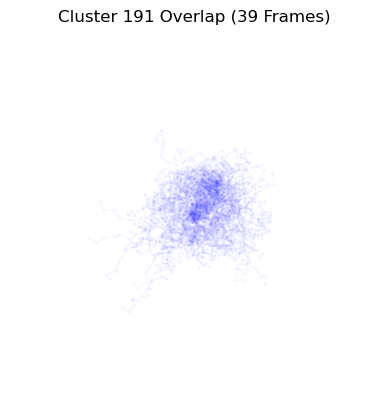

Aligning frames: 100%|█████████████████████████| 92/92 [00:00<00:00, 162.30it/s]


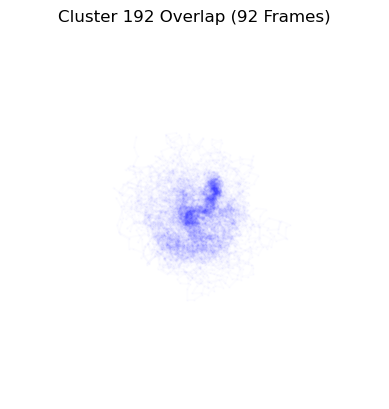

Aligning frames: 100%|█████████████████████████| 58/58 [00:00<00:00, 145.00it/s]


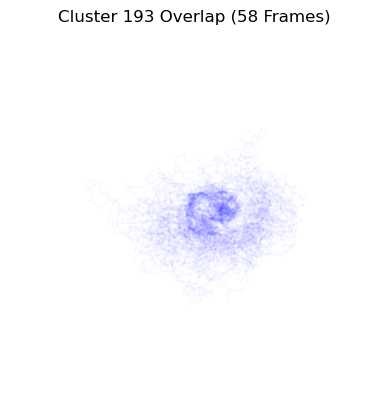

Aligning frames: 100%|███████████████████████| 180/180 [00:01<00:00, 149.51it/s]


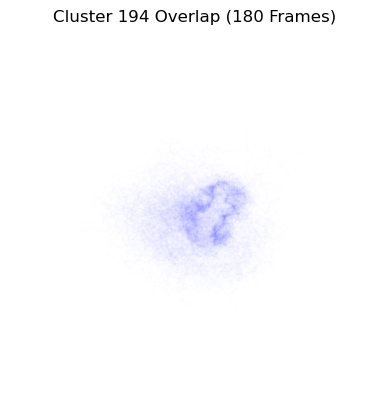

Aligning frames: 100%|█████████████████████████| 63/63 [00:00<00:00, 165.53it/s]


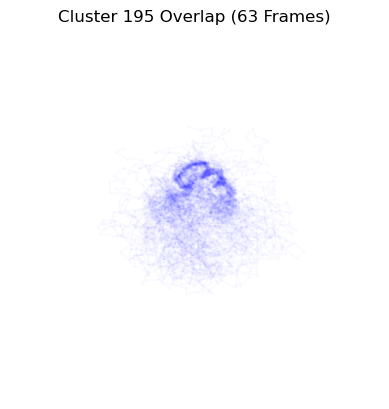

Aligning frames: 100%|█████████████████████████| 80/80 [00:00<00:00, 101.41it/s]


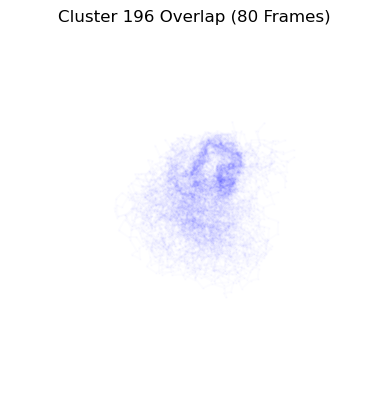

Aligning frames: 100%|███████████████████████| 217/217 [00:01<00:00, 139.06it/s]


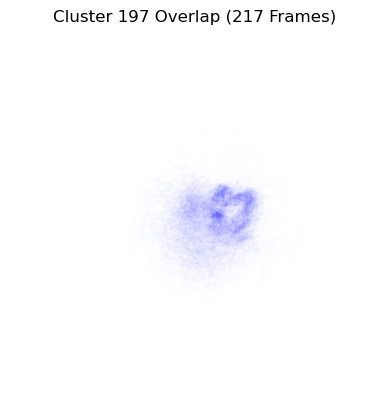

Aligning frames: 100%|███████████████████████| 241/241 [00:01<00:00, 136.04it/s]


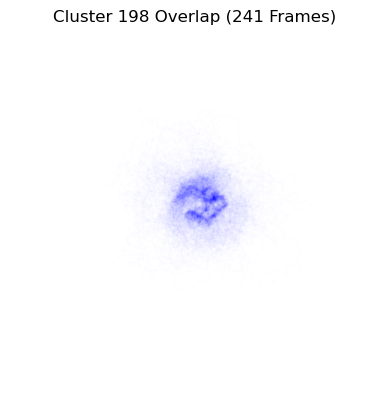

Aligning frames: 100%|███████████████████████| 184/184 [00:01<00:00, 128.20it/s]


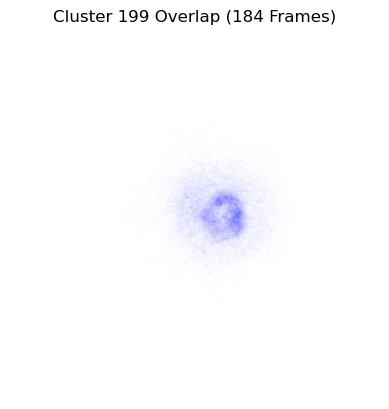

Aligning frames: 100%|███████████████████████| 164/164 [00:01<00:00, 141.11it/s]


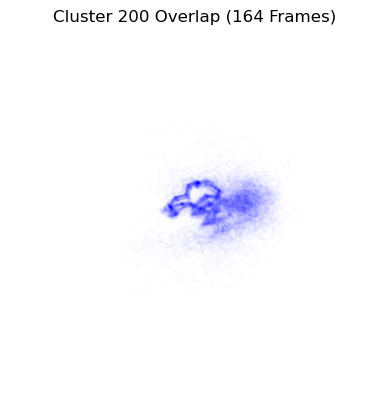

Aligning frames: 100%|███████████████████████| 462/462 [00:03<00:00, 131.38it/s]


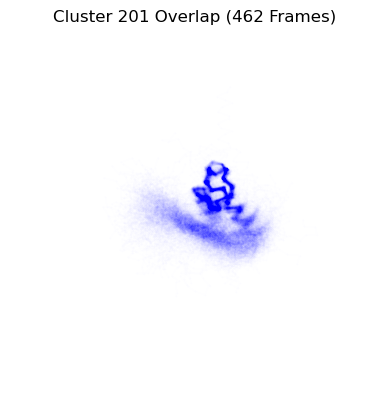

Aligning frames: 100%|███████████████████████| 221/221 [00:01<00:00, 158.87it/s]


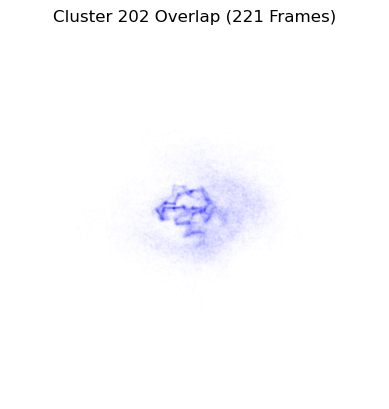

Aligning frames: 100%|███████████████████████| 112/112 [00:00<00:00, 117.96it/s]


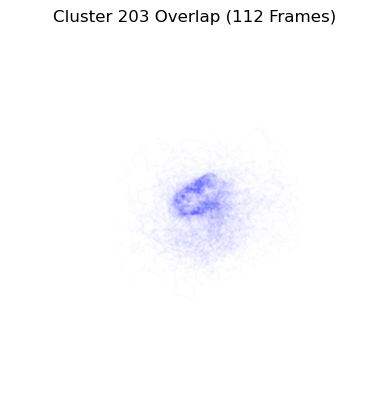

Aligning frames: 100%|█████████████████████████| 60/60 [00:00<00:00, 145.79it/s]


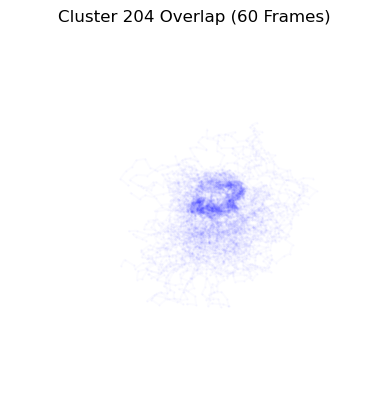

Aligning frames: 100%|█████████████████████████| 17/17 [00:00<00:00, 136.89it/s]


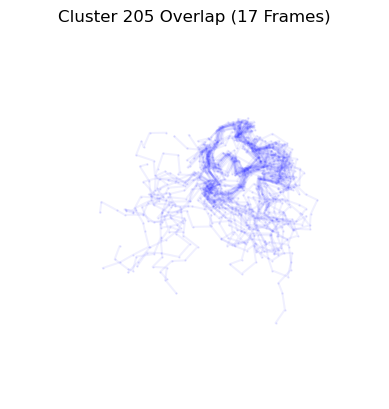

Aligning frames: 100%|█████████████████████████| 15/15 [00:00<00:00, 146.57it/s]


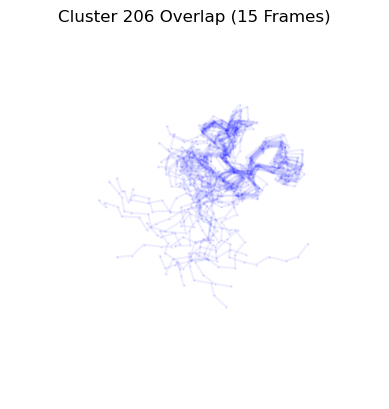

Aligning frames: 100%|█████████████████████████| 31/31 [00:00<00:00, 169.22it/s]


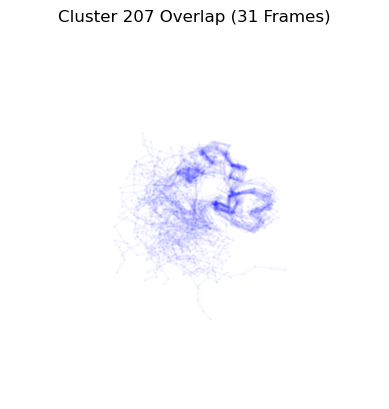

Aligning frames: 100%|█████████████████████████| 30/30 [00:00<00:00, 154.37it/s]


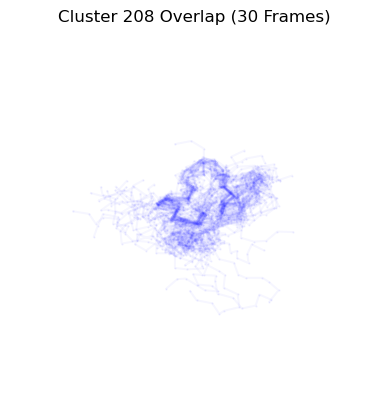

Aligning frames: 100%|██████████████████████████| 26/26 [00:00<00:00, 61.99it/s]


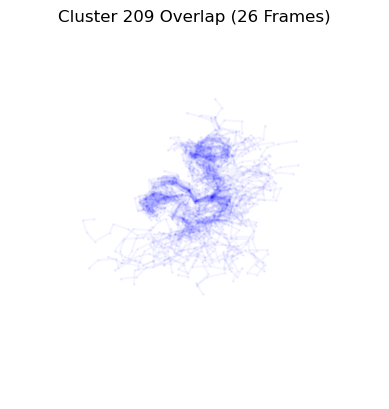

Aligning frames: 100%|█████████████████████████| 20/20 [00:00<00:00, 164.40it/s]


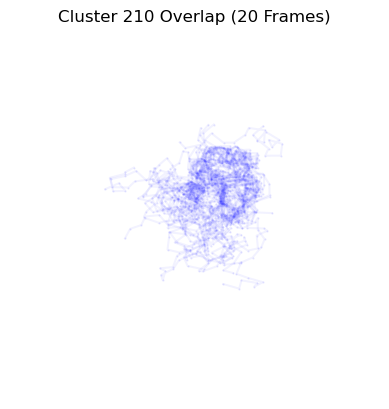

Aligning frames: 100%|█████████████████████████| 71/71 [00:00<00:00, 134.86it/s]


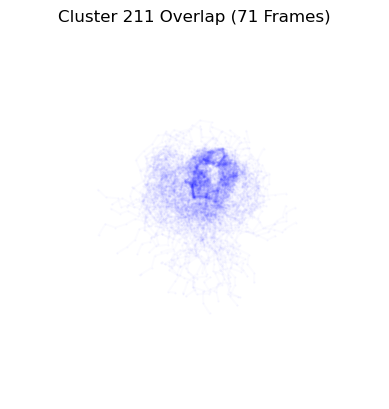

Aligning frames: 100%|███████████████████████| 103/103 [00:00<00:00, 129.91it/s]


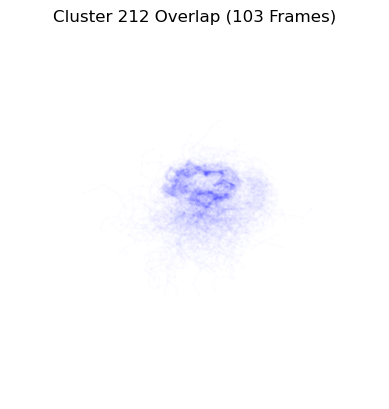

Aligning frames: 100%|███████████████████████| 110/110 [00:00<00:00, 117.54it/s]


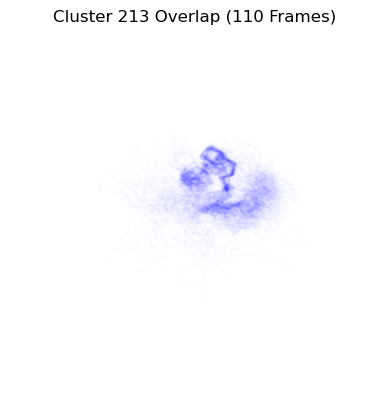

Aligning frames: 100%|███████████████████████| 142/142 [00:00<00:00, 149.78it/s]


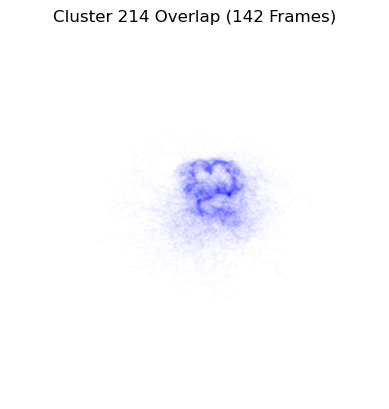

Aligning frames: 100%|██████████████████████████| 23/23 [00:00<00:00, 98.91it/s]


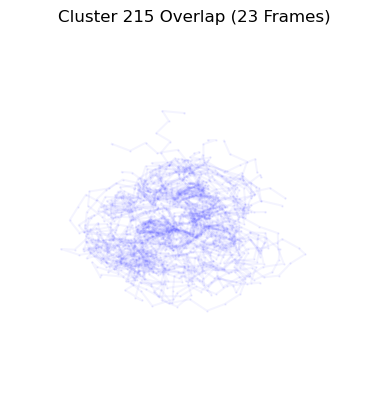

Aligning frames: 100%|███████████████████████| 134/134 [00:01<00:00, 127.38it/s]


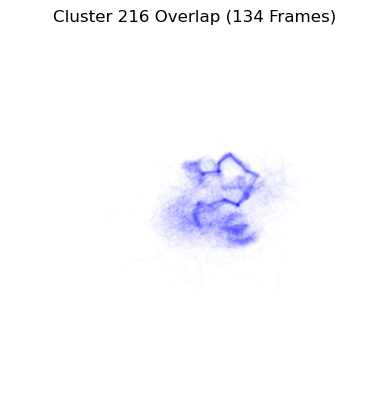

Aligning frames: 100%|█████████████████████████| 86/86 [00:00<00:00, 140.85it/s]


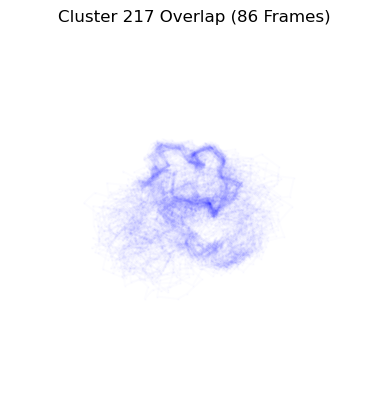

Aligning frames: 100%|█████████████████████████| 39/39 [00:00<00:00, 157.54it/s]


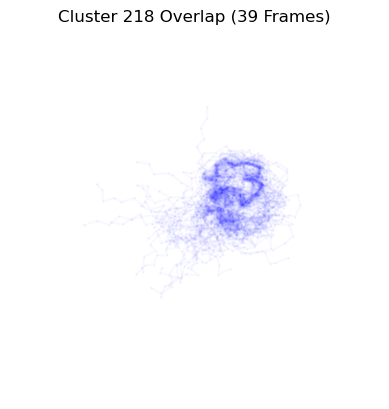

Aligning frames: 100%|█████████████████████████| 64/64 [00:00<00:00, 126.44it/s]


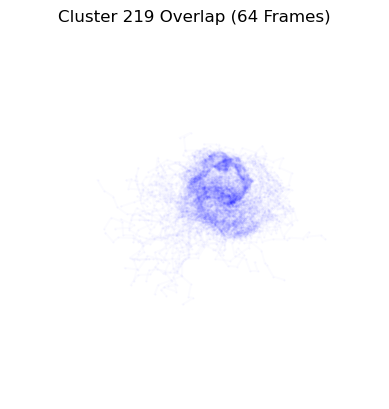

Aligning frames: 100%|██████████████████████████| 57/57 [00:00<00:00, 96.81it/s]


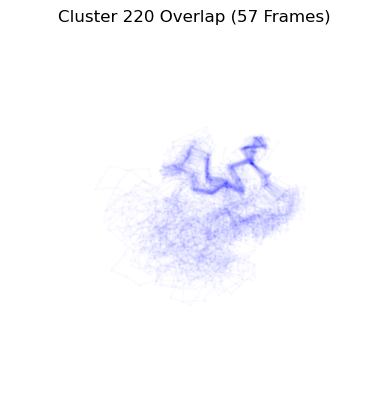

Aligning frames: 100%|█████████████████████████| 60/60 [00:00<00:00, 169.29it/s]


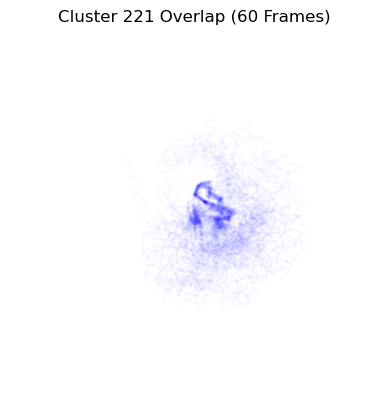

Aligning frames: 100%|█████████████████████████| 41/41 [00:00<00:00, 145.85it/s]


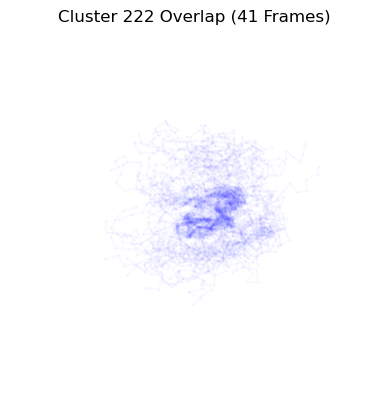

Aligning frames: 100%|███████████████████████| 179/179 [00:01<00:00, 160.27it/s]


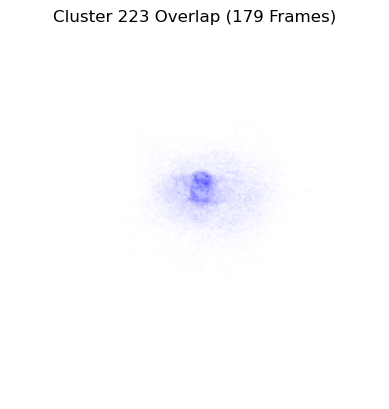

Aligning frames: 100%|███████████████████████| 211/211 [00:01<00:00, 145.74it/s]


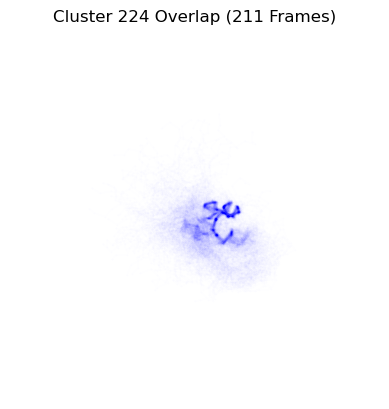

Aligning frames: 100%|███████████████████████| 168/168 [00:01<00:00, 120.91it/s]


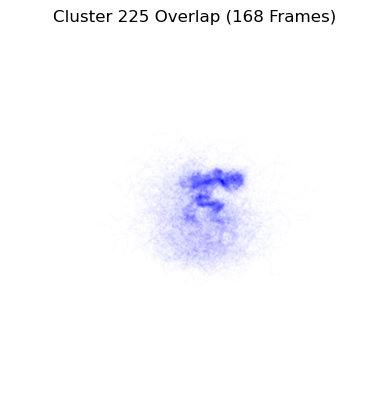

Aligning frames: 100%|███████████████████████| 165/165 [00:01<00:00, 144.09it/s]


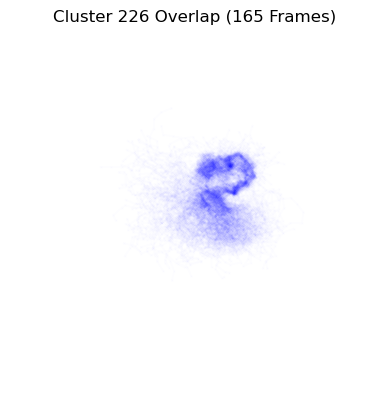

Aligning frames: 100%|█████████████████████████| 70/70 [00:00<00:00, 119.44it/s]


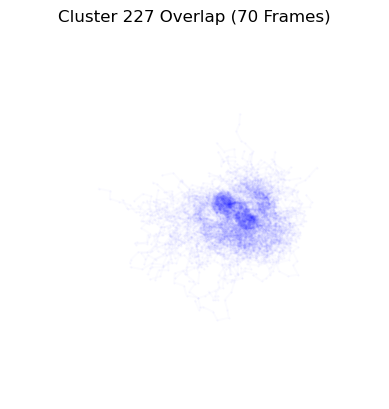

Aligning frames: 100%|█████████████████████████| 83/83 [00:00<00:00, 153.02it/s]


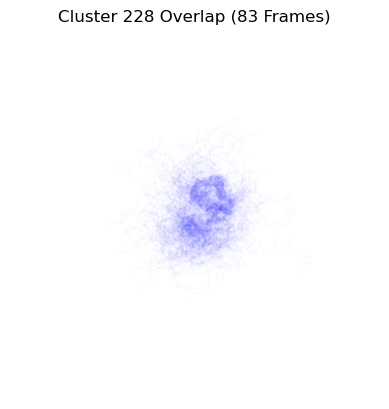

Aligning frames: 100%|█████████████████████████| 89/89 [00:00<00:00, 162.34it/s]


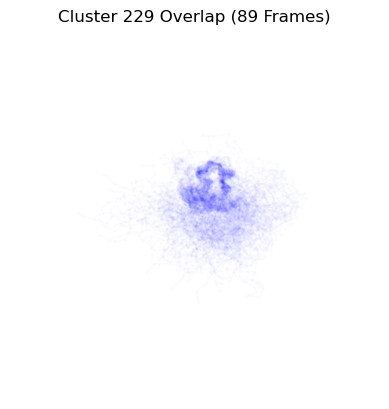

Aligning frames: 100%|███████████████████████| 278/278 [00:02<00:00, 134.22it/s]


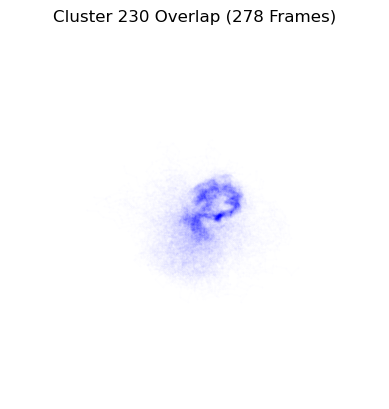

In [20]:
# Define the function to extract frames from both universes
def extract_frames(indices, universe1, universe2, switch_index=40000):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        if idx < switch_index:
            universe1.trajectory[idx]
            frames.append(universe1.select_atoms("name CA").positions.copy())
        else:
            universe2.trajectory[idx - switch_index]
            frames.append(universe2.select_atoms("name CA").positions.copy())
    return frames

# Create a temporary Universe for alignment
def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("name CA"))
    temp_universe.atoms.positions = positions
    return temp_universe

# Align frames using AlignTraj
def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

# Selection string for residues 15-30 to ensure alignment of corresponding residues
select_residues_15_30 = "resid 15-30 and name CA"

# Function to plot aligned frames for a given cluster
def plot_aligned_frames(cluster_id, indices):
    # Extract frames for the cluster
    frames = extract_frames(indices, u1, u2)
    
    # Create reference universe for alignment
    reference_universe = create_temp_universe(frames[0], u1)
    
    # Align frames using the specific residues 15-30
    aligned_frames = align_frames(reference_universe, frames, select_residues_15_30)
    
    # Set the opacity value
    opacity = 1 / len(aligned_frames)
    
    # Plot the aligned frames from different angles
    angles = [(30, 30)]
    
    for angle in angles:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot cluster frames with lines connecting the alpha carbons
        for positions in aligned_frames:
            ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color='blue', markersize=1, markeredgewidth=0.8, alpha=opacity)
        
        ax.view_init(elev=angle[0], azim=angle[1])
        ax.set_axis_off()  # Remove axes
        ax.grid(False)     # Remove grid lines
        plt.title(f'Cluster {cluster_id} Overlap ({len(aligned_frames)} Frames)')
        plt.show()

# Group the DataFrame by 'cluster' and get the indices for each cluster
cluster_indices = latent.groupby('cluster').apply(lambda df: df.index.tolist()).to_dict()

# Plot aligned frames for each cluster
for cluster_id, indices in cluster_indices.items():
    plot_aligned_frames(cluster_id, indices)